# Predicción del Resultado Académico basado en Características Personales, Familiares y Hábitos de Estudio utilizando Redes Neuronales

## Introducción

### Contexto

En el campo de la educación, es de gran interés comprender qué factores pueden influir en el rendimiento académico de los estudiantes. Esta información es valiosa tanto para los educadores como para los propios estudiantes, ya que les permite identificar áreas de mejora y tomar medidas para maximizar su éxito académico. Con el avance de las técnicas de aprendizaje automático, ahora podemos aprovechar estas herramientas para realizar predicciones basadas en datos y obtener una visión más precisa sobre los resultados académicos.

### Objetivo

El objetivo principal de este proyecto es desarrollar un modelo de aprendizaje de máquina supervisado capaz de predecir el resultado académico de los estudiantes en función de una serie de características recopiladas a través de una encuesta. El conjunto de datos utilizado para este estudio consta de 145 instancias, cada una correspondiente a las respuestas de un estudiante en particular. Las características se dividen en tres categorías: información personal, preguntas familiares y hábitos de estudio.

### Metodología

Para alcanzar nuestro objetivo, seguiremos los siguientes pasos:

1. Preparación de los datos: Cargaremos el conjunto de datos y realizaremos las tareas necesarias para garantizar que los datos sean adecuados para su procesamiento.
2. Análisis exploratorio de datos: Realizaremos una exploración inicial de los datos para comprender mejor su distribución, relaciones y posibles patrones.
3. Preprocesamiento de datos: Realizaremos transformaciones y limpieza de los datos para asegurarnos de que sean adecuados para el entrenamiento del modelo.
4. Selección y entrenamiento del modelo: Seleccionaremos algunas arquitecturas de redes y entrenaremos los modelos utilizando el conjunto de datos preparado.
5. Evaluación del modelo: Evaluaremos el rendimiento de los modelos utilizando métricas adecuadas, para así seleccionar el más óptimo.
6. Predicciones: Utilizaremos el modelo entrenado para realizar predicciones sobre nuevos datos y analizaremos los resultados obtenidos.

A través de este estudio, esperamos obtener un modelo preciso que pueda predecir el resultado académico de los estudiantes en función de las características proporcionadas. Esto proporcionará una herramienta útil tanto para los educadores como para los propios estudiantes, permitiéndoles tomar decisiones informadas para mejorar su rendimiento académico.

## Import de librerías necesarias y archivo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('hespe-data.csv', sep=";")

## Análisis exploratorio inicial

Las variables iniciales de nuestro dataframe son:
1. student_id
2. age - Student Age (1: 18-21, 2: 22-25, 3: above 26)
3. sex - Sex (1: female, 2: male)
4. graduated_h_school_type - Graduated high-school type: (1: private, 2: state, 3: other)
5. scholarship_type - Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)
6. additional_work - Additional work: (1: Yes, 2: No)
7. activity -Regular artistic or sports activity: (1: Yes, 2: No)
8. partner - Do you have a partner: (1: Yes, 2: No)
9. total_salary - Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)
10. transport - Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)
11. accomodation - Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)
12. mother_ed - Mother's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
13. farther_ed - Father's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
14. siblings - Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)
15. parental_status - Parental status: (1: married, 2: divorced, 3: died - one of them or both)
16. mother_occup - Mother's occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)
17. father_occup - Father's occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)
18. weekly_study_hours - Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)
19. reading_non_scientific - Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)
20. reading_scientific - Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)
21. attendance_seminars_dep -Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)
22. impact_of_projects - Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)
23. attendances_classes - Attendance to classes (1: always, 2: sometimes, 3: never)
24. preparation_midterm_company - Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)
25. preparation_midterm_time - Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)
26. taking_notes - Taking notes in classes: (1: never, 2: sometimes, 3: always)
27. listenning - Listening in classes: (1: never, 2: sometimes, 3: always)
28. discussion_improves_interest - Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)
29. flip_classrom - Flip-classroom: (1: not useful, 2: useful, 3: not applicable)
30. grade_previous - Cumulative grade point average in the last semester (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
31. grade_expected - Expected Cumulative grade point average in the graduation (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
32. course_id
33. grade - OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)

In [ ]:
df.head(5)

,student_id,age,sex,graduated_h_school_type,scholarship_type,additional_work,activity,partner,total_salary,transport,accomodation,mother_ed,farther_ed,siblings,parental_status,mother_occup,father_occup,weekly_study_hours,reading_non_scientific,reading_scientific,attendance_seminars_dep,impact_of_projects,attendances_classes,preparation_midterm_company,preparation_midterm_time,taking_notes,listenning,discussion_improves_interest,flip_classrom,grade_previous,grade_expected,course_id,grade
0,STUDENT1,2,2,3,3,1,2,2,1,1,1,1,2,3,1,2,5,3,2,2,1,1,1,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,1,2,3,2,1,2,1,2,2,2,1,1,1,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,2,2,2,2,1,2,1,2,1,2,1,1,1,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,2,1,2,5,1,2,1,3,1,2,1,1,1,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,4,3,3,2,1,2,4,2,1,1,1,1,1,2,1,2,2,2,1,2,2,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   student_id                    145 non-null    object
 1   age                           145 non-null    int64 
 2   sex                           145 non-null    int64 
 3   graduated_h_school_type       145 non-null    int64 
 4   scholarship_type              145 non-null    int64 
 5   additional_work               145 non-null    int64 
 6   activity                      145 non-null    int64 
 7   partner                       145 non-null    int64 
 8   total_salary                  145 non-null    int64 
 9   transport                     145 non-null    int64 
 10  accomodation                  145 non-null    int64 
 11  mother_ed                     145 non-null    int64 
 12  farther_ed                    145 non-null    int64 
 13  siblings            

In [ ]:
df.duplicated().sum()

0

### Datos faltantes y nulos

In [ ]:
df.isna().sum()

student_id                      0
age                             0
sex                             0
graduated_h_school_type         0
scholarship_type                0
additional_work                 0
activity                        0
partner                         0
total_salary                    0
transport                       0
accomodation                    0
mother_ed                       0
farther_ed                      0
siblings                        0
parental_status                 0
mother_occup                    0
father_occup                    0
weekly_study_hours              0
reading_non_scientific          0
reading_scientific              0
attendance_seminars_dep         0
impact_of_projects              0
attendances_classes             0
preparation_midterm_company     0
preparation_midterm_time        0
taking_notes                    0
listenning                      0
discussion_improves_interest    0
flip_classrom                   0
grade_previous

In [ ]:
df.isnull().sum()

student_id                      0
age                             0
sex                             0
graduated_h_school_type         0
scholarship_type                0
additional_work                 0
activity                        0
partner                         0
total_salary                    0
transport                       0
accomodation                    0
mother_ed                       0
farther_ed                      0
siblings                        0
parental_status                 0
mother_occup                    0
father_occup                    0
weekly_study_hours              0
reading_non_scientific          0
reading_scientific              0
attendance_seminars_dep         0
impact_of_projects              0
attendances_classes             0
preparation_midterm_company     0
preparation_midterm_time        0
taking_notes                    0
listenning                      0
discussion_improves_interest    0
flip_classrom                   0
grade_previous

In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144
student_id,STUDENT1,STUDENT2,STUDENT3,STUDENT4,STUDENT5,STUDENT6,STUDENT7,STUDENT8,STUDENT9,STUDENT10,STUDENT11,STUDENT12,STUDENT13,STUDENT14,STUDENT15,STUDENT16,STUDENT17,STUDENT18,STUDENT19,STUDENT20,STUDENT21,STUDENT22,STUDENT23,STUDENT24,STUDENT25,STUDENT26,STUDENT27,STUDENT28,STUDENT29,STUDENT30,STUDENT31,STUDENT32,STUDENT33,STUDENT34,STUDENT35,STUDENT36,STUDENT37,STUDENT38,STUDENT39,STUDENT40,STUDENT41,STUDENT42,STUDENT43,STUDENT44,STUDENT45,STUDENT46,STUDENT47,STUDENT48,STUDENT49,STUDENT50,STUDENT51,STUDENT52,STUDENT53,STUDENT54,STUDENT55,STUDENT56,STUDENT57,STUDENT58,STUDENT59,STUDENT60,STUDENT61,STUDENT62,STUDENT63,STUDENT64,STUDENT65,STUDENT66,STUDENT67,STUDENT68,STUDENT69,STUDENT70,STUDENT71,STUDENT72,STUDENT73,STUDENT74,STUDENT75,STUDENT76,STUDENT77,STUDENT78,STUDENT79,STUDENT80,STUDENT81,STUDENT82,STUDENT83,STUDENT84,STUDENT85,STUDENT86,STUDENT87,STUDENT88,STUDENT89,STUDENT90,STUDENT91,STUDENT92,STUDENT93,STUDENT94,STUDENT95,STUDENT96,STUDENT97,STUDENT98,STUDENT99,STUDENT100,STUDENT101,STUDENT102,STUDENT103,STUDENT104,STUDENT105,STUDENT106,STUDENT107,STUDENT108,STUDENT109,STUDENT110,STUDENT111,STUDENT112,STUDENT113,STUDENT114,STUDENT115,STUDENT116,STUDENT117,STUDENT118,STUDENT119,STUDENT120,STUDENT121,STUDENT122,STUDENT123,STUDENT124,STUDENT125,STUDENT126,STUDENT127,STUDENT128,STUDENT129,STUDENT130,STUDENT131,STUDENT132,STUDENT133,STUDENT134,STUDENT135,STUDENT136,STUDENT137,STUDENT138,STUDENT139,STUDENT140,STUDENT141,STUDENT142,STUDENT143,STUDENT144,STUDENT145
age,2,2,2,1,2,2,1,1,2,2,1,1,1,2,3,2,1,2,1,1,1,1,2,3,2,2,2,1,3,2,2,3,2,2,1,1,2,2,2,2,1,3,2,1,2,1,2,2,1,1,2,2,2,2,2,3,2,2,3,2,2,1,2,2,2,1,2,2,2,2,1,1,1,2,1,1,2,1,2,2,2,3,2,2,3,1,2,2,1,2,2,2,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,2,1,2,1,2,2,2,2,2,3,1,2,2,2,1,2,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,2,1
sex,2,2,2,1,2,2,2,1,1,1,1,1,1,1,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,1,1,1,2,2,2,2,2,2,1,2,2,2,2,2,2,2,1,1,2,1,2,2,2,2,2,2,1,2,1,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,1,1,2,2,1,1,1,1,1,1,1,2,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
graduated_h_school_type,3,3,2,1,1,2,2,2,3,2,1,1,1,2,2,2,2,2,2,1,2,2,2,2,2,2,2,1,2,3,2,2,2,2,1,1,3,2,2,2,1,2,2,2,3,2,2,2,2,1,2,3,2,2,2,2,2,2,2,2,2,3,2,2,3,2,2,3,2,2,2,3,2,2,2,2,1,1,2,2,2,2,2,3,3,2,2,2,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2,1,2,2,2,2,1,1,2,1,3,3,2,2,2,1,2,2,1,2,2,3,2,2,1,2,2,2,2,1,1,2,2,2,2,1,2,2,2,2,1,2,1
scholarship_type,3,3,3,3,3,3,4,3,3,3,3,4,4,5,4,3,5,3,4,3,5,5,3,2,3,3,3,3,3,4,5,3,3,3,3,4,4,3,5,3,3,3,3,3,3,3,3,3,3,4,3,3,3,3,3,3,3,3,3,3,3,3,3,4,5,3,3,3,4,4,4,4,3,4,4,4,2,2,4,4,3,3,4,3,3,5,4,3,4,3,3,5,3,1,3,5,4,4,4,3,4,4,3,4,3,4,4,4,5,3,3,5,3,3,5,5,5,3,5,4,3,3,5,3,4,5,4,4,4,3,3,5,5,5,4,3,3,5,4,4,3,4,4,4,5
additional_work,1,1,2,1,2,2,2,1,2,2,2,1,2,2,1,2,2,2,2,2,1,2,1,1,2,2,2,1,2,2,1,1,2,1,2,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,1,1,2,2,1,2,1,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,1,2,1,1,1,2,1,2,2,2,2,2,2,1,2,1,2,1,2,1,2,2,2,2,2,2,2,1,2,1,2,2,2,2,1,2,1,1,2,2,2,2,1,1,2,2,1,1,1,2,2,1,1,2,2,2,2,1,1,2,1,1,1,2,2,1,2
activity,2,2,2,2,2,2,2,1,1,2,2,1,2,2,1,2,1,2,2,2,2,2,2,1,2,2,1,2,2,2,1,2,2,2,2,2,2,1,2,2,2,2,1,2,2,2,2,2,1,2,2,1,2,1,2,2,1,1,2,1,2,1,2,2,2,2,2,1,2,2,1,2,1,2,2,1,1,2,1,2,2,2,2,2,2,2,2,1,1,2,1,1,2,2,2,1,1,2,1,2,2,2,2,2,2,1,1,1,1,1,2,1,2,2,1,2,2,1,1,1,1,1,1,2,1,1,1,2,1,1,1,1,1,2,1,1,1,1,1,2,1,2,2,1,2
partner,2,2,2,1,1,2,2,1,1,1,2,2,2,2,2,2,2,2,2,1,1,1,1,2,2,1,1,2,1,2,1,2,2,1,1,2,1,1,2,1,2,2,2,1,1,1,1,1,1,2,1,2,2,2,2,1,2,2,1,1,2,2,2,1,2,1,1,2,2,1,1,2,1,2,2,2,2,1,2,2,1,2,1,2,1,2,2,2,1,2,1,1,2,1,1,1,1,2,2,2,2,1,1,1,2

Hasta el momento, no se han identificado valores nulos ni faltantes en el conjunto de datos. Sin embargo, revisaré en particular las columnas 'total_salary' y 'siblings', ya que en la descripción de las variables se menciona que se ingresarán valores en caso de tener información.

In [ ]:
df['total_salary'].unique()

array([1, 2, 3, 4, 5])

In [ ]:
df['total_salary'].value_counts()

1    93
2    27
3    16
5     5
4     4
Name: total_salary, dtype: int64

In [ ]:
df['siblings'].unique()

array([3, 2, 5, 1, 4])

In [ ]:
df['siblings'].value_counts()

2    45
1    27
3    26
5    24
4    23
Name: siblings, dtype: int64

Tras una revisión exhaustiva de las columnas del conjunto de datos, no se identificaron valores nulos o faltantes en ninguna de ellas. Esto indica que el conjunto de datos está completo y no requiere ningún tratamiento adicional para manejar valores faltantes.

### Data Wrangling

Al revisar las columnas y sus tipos de entrada, se observa la presencia de varias variables categóricas en el conjunto de datos. Con el objetivo de preparar adecuadamente nuestros datos para el modelo de aprendizaje de máquina, procederemos a clasificar las variables y luego procesaremos las variables categóricas de tal modo que puedan ser utilizadas en nuestro modelo. Este procesamiento puede incluir técnicas como la binarización o la creación de variables ficticias (dummy variables) para representar las categorías de manera numérica, lo cual permitirá una mejor interpretación por parte del modelo.

#### Columna: Sex

In [ ]:
df['sex'] = df['sex'].apply(lambda x: 'female' if x == 1 else 'male')

In [ ]:
df.sample(5)

,student_id,age,sex,graduated_h_school_type,scholarship_type,additional_work,activity,partner,total_salary,transport,accomodation,mother_ed,farther_ed,siblings,parental_status,mother_occup,father_occup,weekly_study_hours,reading_non_scientific,reading_scientific,attendance_seminars_dep,impact_of_projects,attendances_classes,preparation_midterm_company,preparation_midterm_time,taking_notes,listenning,discussion_improves_interest,flip_classrom,grade_previous,grade_expected,course_id,grade
134,STUDENT135,1,female,2,4,2,1,2,1,2,3,1,1,2,1,4,3,2,2,2,2,1,1,1,1,2,1,2,1,2,3,9,1
100,STUDENT101,1,male,2,4,2,2,2,1,2,3,4,1,2,1,3,3,2,2,2,1,1,1,1,1,2,2,2,1,3,3,7,6
58,STUDENT59,3,male,2,3,2,2,1,3,1,1,1,3,5,2,2,1,3,2,2,1,1,1,1,1,3,2,2,2,5,4,1,3
50,STUDENT51,2,male,2,3,2,2,1,2,2,1,1,1,2,1,2,3,2,2,2,1,1,2,1,1,2,2,2,3,3,3,1,1
94,STUDENT95,2,male,2,3,2,2,1,1,1,1,3,2,5,1,2,5,2,2,3,1,1,1,1,1,3,2,2,3,5,4,6,6


In [ ]:
df['sex'] = pd.get_dummies(df['sex'],drop_first=True)

In [ ]:
df.head(5)

,student_id,age,sex,graduated_h_school_type,scholarship_type,additional_work,activity,partner,total_salary,transport,accomodation,mother_ed,farther_ed,siblings,parental_status,mother_occup,father_occup,weekly_study_hours,reading_non_scientific,reading_scientific,attendance_seminars_dep,impact_of_projects,attendances_classes,preparation_midterm_company,preparation_midterm_time,taking_notes,listenning,discussion_improves_interest,flip_classrom,grade_previous,grade_expected,course_id,grade
0,STUDENT1,2,1,3,3,1,2,2,1,1,1,1,2,3,1,2,5,3,2,2,1,1,1,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,1,3,3,1,2,2,1,1,1,2,3,2,1,2,1,2,2,2,1,1,1,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,1,2,3,2,2,2,2,4,2,2,2,2,1,2,1,2,1,2,1,1,1,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,0,1,3,1,2,1,2,1,2,1,2,5,1,2,1,3,1,2,1,1,1,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,1,1,3,2,2,1,3,1,4,3,3,2,1,2,4,2,1,1,1,1,1,2,1,2,2,2,1,2,2,1,1


In [ ]:
df = df.rename(columns={'sex':'sex_male'})

In [ ]:
df.head(5)

,student_id,age,sex_male,graduated_h_school_type,scholarship_type,additional_work,activity,partner,total_salary,transport,accomodation,mother_ed,farther_ed,siblings,parental_status,mother_occup,father_occup,weekly_study_hours,reading_non_scientific,reading_scientific,attendance_seminars_dep,impact_of_projects,attendances_classes,preparation_midterm_company,preparation_midterm_time,taking_notes,listenning,discussion_improves_interest,flip_classrom,grade_previous,grade_expected,course_id,grade
0,STUDENT1,2,1,3,3,1,2,2,1,1,1,1,2,3,1,2,5,3,2,2,1,1,1,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,1,3,3,1,2,2,1,1,1,2,3,2,1,2,1,2,2,2,1,1,1,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,1,2,3,2,2,2,2,4,2,2,2,2,1,2,1,2,1,2,1,1,1,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,0,1,3,1,2,1,2,1,2,1,2,5,1,2,1,3,1,2,1,1,1,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,1,1,3,2,2,1,3,1,4,3,3,2,1,2,4,2,1,1,1,1,1,2,1,2,2,2,1,2,2,1,1


#### Columnas: additional_work, activity, partner, attendance_seminars_dep

Todas estas columnas tienen como entrada 1: Yes, 2: No, lo que haremos es transformar el 2 a 0.

In [ ]:
df['additional_work'] = df['additional_work'].apply(lambda x: 0 if x==2 else 1)

In [ ]:
df['activity'] = df['activity'].apply(lambda x: 0 if x==2 else 1)

In [ ]:
df['partner'] = df['partner'].apply(lambda x: 0 if x==2 else 1)

In [ ]:
df['attendance_seminars_dep'] = df['attendance_seminars_dep'].apply(lambda x: 0 if x==2 else 1)

In [ ]:
df.head(5)

,student_id,age,sex_male,graduated_h_school_type,scholarship_type,additional_work,activity,partner,total_salary,transport,accomodation,mother_ed,farther_ed,siblings,parental_status,mother_occup,father_occup,weekly_study_hours,reading_non_scientific,reading_scientific,attendance_seminars_dep,impact_of_projects,attendances_classes,preparation_midterm_company,preparation_midterm_time,taking_notes,listenning,discussion_improves_interest,flip_classrom,grade_previous,grade_expected,course_id,grade
0,STUDENT1,2,1,3,3,1,0,0,1,1,1,1,2,3,1,2,5,3,2,2,1,1,1,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,1,3,3,1,0,0,1,1,1,2,3,2,1,2,1,2,2,2,1,1,1,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,1,2,3,0,0,0,2,4,2,2,2,2,1,2,1,2,1,2,1,1,1,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,0,1,3,1,0,1,2,1,2,1,2,5,1,2,1,3,1,2,1,1,1,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,1,1,3,0,0,1,3,1,4,3,3,2,1,2,4,2,1,1,1,1,1,2,1,2,2,2,1,2,2,1,1


#### Columna: graduated_h_school_type

Pasaremos la columna a las etiquetas para luego poder usar dummies, usando 1: private_hschool, 2: state_hschool, 3: other_hschool.

In [ ]:
df['graduated_h_school_type'] = df['graduated_h_school_type'].apply(lambda x: 'private_hs' if x==1 else 'state_hs' if x==2 else 'other_hs')

In [ ]:
df_ghs = pd.get_dummies(df['graduated_h_school_type'])

In [ ]:
df_ghs.sum()

other_hs       17
private_hs     25
state_hs      103
dtype: int64

In [ ]:
df_ghs = df_ghs.drop(columns='private_hs')#iré eliminado de modo que la colinealidad sea evitada en su mayoría

In [ ]:
df = pd.concat([df, df_ghs], axis=1)

In [ ]:
df.drop(columns='graduated_h_school_type', inplace=True)

In [ ]:
df.drop(columns='student_id', inplace=True)

In [ ]:
df.head(5)

,age,sex_male,scholarship_type,additional_work,activity,partner,total_salary,transport,accomodation,mother_ed,farther_ed,siblings,parental_status,mother_occup,father_occup,weekly_study_hours,reading_non_scientific,reading_scientific,attendance_seminars_dep,impact_of_projects,attendances_classes,preparation_midterm_company,preparation_midterm_time,taking_notes,listenning,discussion_improves_interest,flip_classrom,grade_previous,grade_expected,course_id,grade,other_hs,state_hs
0,2,1,3,1,0,0,1,1,1,1,2,3,1,2,5,3,2,2,1,1,1,1,1,3,2,1,2,1,1,1,1,1,0
1,2,1,3,1,0,0,1,1,1,2,3,2,1,2,1,2,2,2,1,1,1,1,1,3,2,3,2,2,3,1,1,1,0
2,2,1,3,0,0,0,2,4,2,2,2,2,1,2,1,2,1,2,1,1,1,1,1,2,2,1,1,2,2,1,1,0,1
3,1,0,3,1,0,1,2,1,2,1,2,5,1,2,1,3,1,2,1,1,1,1,2,3,2,2,1,3,2,1,1,0,0
4,2,1,3,0,0,1,3,1,4,3,3,2,1,2,4,2,1,1,1,1,1,2,1,2,2,2,1,2,2,1,1,0,0


#### Columna: transport

Pasaremos la columna a las etiquetas de cada entrar para luego poder usar dummies, usando 1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other.

In [ ]:
df['transport'] = df['transport'].apply(lambda x: 'bus' if x==1 else 'private_car_taxi' if x==2 else 'bicycle' if x==3 else 'other')

In [ ]:
df['transport'].value_counts()

bus                 98
private_car_taxi    25
other               21
bicycle              1
Name: transport, dtype: int64

In [ ]:
df_transport = pd.get_dummies(df['transport'])

In [ ]:
df_transport.sum()

bicycle              1
bus                 98
other               21
private_car_taxi    25
dtype: int64

In [ ]:
df = pd.concat([df, df_transport], axis=1)

In [ ]:
df.drop(columns=['transport','bicycle'], inplace=True)

In [ ]:
df = df.rename(columns={'other': 'other_transport'})

In [ ]:
df.head(5)

,age,sex_male,scholarship_type,additional_work,activity,partner,total_salary,accomodation,mother_ed,farther_ed,siblings,parental_status,mother_occup,father_occup,weekly_study_hours,reading_non_scientific,reading_scientific,attendance_seminars_dep,impact_of_projects,attendances_classes,preparation_midterm_company,preparation_midterm_time,taking_notes,listenning,discussion_improves_interest,flip_classrom,grade_previous,grade_expected,course_id,grade,other_hs,state_hs,bus,other_transport,private_car_taxi
0,2,1,3,1,0,0,1,1,1,2,3,1,2,5,3,2,2,1,1,1,1,1,3,2,1,2,1,1,1,1,1,0,1,0,0
1,2,1,3,1,0,0,1,1,2,3,2,1,2,1,2,2,2,1,1,1,1,1,3,2,3,2,2,3,1,1,1,0,1,0,0
2,2,1,3,0,0,0,2,2,2,2,2,1,2,1,2,1,2,1,1,1,1,1,2,2,1,1,2,2,1,1,0,1,0,1,0
3,1,0,3,1,0,1,2,2,1,2,5,1,2,1,3,1,2,1,1,1,1,2,3,2,2,1,3,2,1,1,0,0,1,0,0
4,2,1,3,0,0,1,3,4,3,3,2,1,2,4,2,1,1,1,1,1,2,1,2,2,2,1,2,2,1,1,0,0,1,0,0


#### Columna: accomodation

In [ ]:
df['accomodation'] = df['accomodation'].apply(lambda x: 'acc_rental' if x==1 else 'acc_dormitory' if x==2 else 'acc_with_family' if x==3 else 'acc_other')

In [ ]:
df['accomodation'].value_counts()

acc_rental         68
acc_dormitory      49
acc_with_family    27
acc_other           1
Name: accomodation, dtype: int64

In [ ]:
df_accomodation = pd.get_dummies(df['accomodation'])

In [ ]:
df_accomodation.sum()

acc_dormitory      49
acc_other           1
acc_rental         68
acc_with_family    27
dtype: int64

In [ ]:
df = pd.concat([df,df_accomodation], axis=1)

In [ ]:
df = df.drop(columns=['acc_other','accomodation'])

In [ ]:
df.head(5)

,age,sex_male,scholarship_type,additional_work,activity,partner,total_salary,mother_ed,farther_ed,siblings,parental_status,mother_occup,father_occup,weekly_study_hours,reading_non_scientific,reading_scientific,attendance_seminars_dep,impact_of_projects,attendances_classes,preparation_midterm_company,preparation_midterm_time,taking_notes,listenning,discussion_improves_interest,flip_classrom,grade_previous,grade_expected,course_id,grade,other_hs,state_hs,bus,other_transport,private_car_taxi,acc_dormitory,acc_rental,acc_with_family
0,2,1,3,1,0,0,1,1,2,3,1,2,5,3,2,2,1,1,1,1,1,3,2,1,2,1,1,1,1,1,0,1,0,0,0,1,0
1,2,1,3,1,0,0,1,2,3,2,1,2,1,2,2,2,1,1,1,1,1,3,2,3,2,2,3,1,1,1,0,1,0,0,0,1,0
2,2,1,3,0,0,0,2,2,2,2,1,2,1,2,1,2,1,1,1,1,1,2,2,1,1,2,2,1,1,0,1,0,1,0,1,0,0
3,1,0,3,1,0,1,2,1,2,5,1,2,1,3,1,2,1,1,1,1,2,3,2,2,1,3,2,1,1,0,0,1,0,0,1,0,0
4,2,1,3,0,0,1,3,3,3,2,1,2,4,2,1,1,1,1,1,2,1,2,2,2,1,2,2,1,1,0,0,1,0,0,0,0,0


#### Columna: parental_status

In [ ]:
df['parental_status'].value_counts() #revisé esto primero porque me parece curioso que no se considere a padres no casados pero no divorciados

1    127
2     11
3      7
Name: parental_status, dtype: int64

In [ ]:
df['parental_status'] = df['parental_status'].apply(lambda x: 'parent_married' if x==1 else 'parent_divorced' if x==2 else 'parent_died' )

In [ ]:
df_parental_status = pd.get_dummies(df['parental_status'])

In [ ]:
df_parental_status.sum()

parent_died          7
parent_divorced     11
parent_married     127
dtype: int64

In [ ]:
df = pd.concat([df,df_parental_status], axis=1)

In [ ]:
df.drop(columns=['parental_status','parent_died'], inplace=True)

In [ ]:
df.sample(5)

,age,sex_male,scholarship_type,additional_work,activity,partner,total_salary,mother_ed,farther_ed,siblings,mother_occup,father_occup,weekly_study_hours,reading_non_scientific,reading_scientific,attendance_seminars_dep,impact_of_projects,attendances_classes,preparation_midterm_company,preparation_midterm_time,taking_notes,listenning,discussion_improves_interest,flip_classrom,grade_previous,grade_expected,course_id,grade,other_hs,state_hs,bus,other_transport,private_car_taxi,acc_dormitory,acc_rental,acc_with_family,parent_divorced,parent_married
101,1,1,4,0,0,1,2,2,3,1,2,4,2,2,2,1,1,1,1,1,3,3,2,1,2,3,7,7,0,1,1,0,0,0,0,1,0,1
113,2,0,3,0,0,0,1,4,4,1,3,2,2,2,3,0,3,2,2,1,2,2,1,1,1,2,8,1,1,0,0,1,0,1,0,0,0,1
82,2,1,4,1,0,1,2,3,1,3,2,3,2,2,3,1,1,1,1,1,3,3,2,3,4,3,5,7,0,1,1,0,0,0,1,0,0,1
83,2,1,3,0,0,0,3,4,4,2,1,2,1,2,2,1,1,1,3,1,3,2,3,3,1,2,5,7,1,0,1,0,0,0,1,0,0,1
116,2,0,5,0,0,0,1,1,1,5,2,4,3,3,3,0,1,1,1,1,3,3,3,1,2,3,8,1,0,1,1,0,0,0,1,0,0,1


#### Columnas: mother_occup, father_occup

In [ ]:
df['mother_occup'] = df['mother_occup'].apply(lambda x: 'mom_retired' if x==1 else 'mom_housewife' if x==2 else 'mom_governmentofficer' if x==3 else 'mom_private_sector_employee' if x== 4 else 'mom_self_employment' if x==5 else 'mom_occup_other')

In [ ]:
df['father_occup'] = df['father_occup'].apply(lambda x: 'dad_retired' if x==1 else  'dad_governmentofficer' if x==2 else 'dad_private_sector_employee' if x== 3 else 'dad_self_employment' if x==4 else 'dad_occup_other')

In [ ]:
df_mother_occup = pd.get_dummies(df['mother_occup'])

In [ ]:
df_father_occup = pd.get_dummies(df['father_occup'])

In [ ]:
df_mother_occup.sum()

mom_governmentofficer           16
mom_housewife                  103
mom_private_sector_employee     18
mom_retired                      6
mom_self_employment              2
dtype: int64

In [ ]:
df_father_occup.sum()

dad_governmentofficer          22
dad_occup_other                14
dad_private_sector_employee    35
dad_retired                    36
dad_self_employment            38
dtype: int64

In [ ]:
df = pd.concat([df,df_mother_occup], axis=1)

In [ ]:
df = pd.concat([df,df_father_occup],axis=1)

In [ ]:
df.drop(columns=['dad_occup_other','mom_self_employment', 'mother_occup','father_occup'],inplace=True)

In [ ]:
df.head(5)

,age,sex_male,scholarship_type,additional_work,activity,partner,total_salary,mother_ed,farther_ed,siblings,weekly_study_hours,reading_non_scientific,reading_scientific,attendance_seminars_dep,impact_of_projects,attendances_classes,preparation_midterm_company,preparation_midterm_time,taking_notes,listenning,discussion_improves_interest,flip_classrom,grade_previous,grade_expected,course_id,grade,other_hs,state_hs,bus,other_transport,private_car_taxi,acc_dormitory,acc_rental,acc_with_family,parent_divorced,parent_married,mom_governmentofficer,mom_housewife,mom_private_sector_employee,mom_retired,dad_governmentofficer,dad_private_sector_employee,dad_retired,dad_self_employment
0,2,1,3,1,0,0,1,1,2,3,3,2,2,1,1,1,1,1,3,2,1,2,1,1,1,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
1,2,1,3,1,0,0,1,2,3,2,2,2,2,1,1,1,1,1,3,2,3,2,2,3,1,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
2,2,1,3,0,0,0,2,2,2,2,2,1,2,1,1,1,1,1,2,2,1,1,2,2,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0
3,1,0,3,1,0,1,2,1,2,5,3,1,2,1,1,1,1,2,3,2,2,1,3,2,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
4,2,1,3,0,0,1,3,3,3,2,2,1,1,1,1,1,2,1,2,2,2,1,2,2,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1


#### Columna: reading_non_scientific, reading_scientific

In [ ]:
df['reading_non_scientific'] = df['reading_non_scientific'].apply(lambda x: 'non_r_nsci' if x==1 else 'sometime_r_nsci' if x==2 else 'often_r_nsci')

In [ ]:
df['reading_scientific'] = df['reading_scientific'].apply(lambda x: 'non_r_sci' if x==1 else 'sometime_r_sci' if x==2 else 'often_r_sci')

In [ ]:
df_reading_non_sci = pd.get_dummies(df['reading_non_scientific'])

In [ ]:
df_reading_sci = pd.get_dummies(df['reading_scientific'])

In [ ]:
df_reading_non_sci.sum()

non_r_nsci         27
often_r_nsci       19
sometime_r_nsci    99
dtype: int64

In [ ]:
df_reading_sci.sum()

non_r_sci          20
often_r_sci        22
sometime_r_sci    103
dtype: int64

In [ ]:
df = pd.concat([df,df_reading_non_sci],axis=1)

In [ ]:
df = pd.concat([df,df_reading_sci], axis=1)

In [ ]:
df.drop(columns=['non_r_sci','often_r_nsci','reading_scientific', 'reading_non_scientific'], inplace=True)

In [ ]:
df.head(5)

,age,sex_male,scholarship_type,additional_work,activity,partner,total_salary,mother_ed,farther_ed,siblings,weekly_study_hours,attendance_seminars_dep,impact_of_projects,attendances_classes,preparation_midterm_company,preparation_midterm_time,taking_notes,listenning,discussion_improves_interest,flip_classrom,grade_previous,grade_expected,course_id,grade,other_hs,state_hs,bus,other_transport,private_car_taxi,acc_dormitory,acc_rental,acc_with_family,parent_divorced,parent_married,mom_governmentofficer,mom_housewife,mom_private_sector_employee,mom_retired,dad_governmentofficer,dad_private_sector_employee,dad_retired,dad_self_employment,non_r_nsci,sometime_r_nsci,often_r_sci,sometime_r_sci
0,2,1,3,1,0,0,1,1,2,3,3,1,1,1,1,1,3,2,1,2,1,1,1,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1
1,2,1,3,1,0,0,1,2,3,2,2,1,1,1,1,1,3,2,3,2,2,3,1,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1
2,2,1,3,0,0,0,2,2,2,2,2,1,1,1,1,1,2,2,1,1,2,2,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1
3,1,0,3,1,0,1,2,1,2,5,3,1,1,1,1,2,3,2,2,1,3,2,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1
4,2,1,3,0,0,1,3,3,3,2,2,1,1,1,2,1,2,2,2,1,2,2,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0


#### Columna : impact_of_projects

In [ ]:
df['impact_of_projects'] = df['impact_of_projects'].apply(lambda x: 'impact_proj_positive' if x==1 else 'impact_proj_negative' if x==2 else 'impact_proj_neutral')

In [ ]:
df_impact_projects = pd.get_dummies(df['impact_of_projects'])

In [ ]:
df_impact_projects.sum()

impact_proj_negative      4
impact_proj_neutral      13
impact_proj_positive    128
dtype: int64

In [ ]:
df = pd.concat([df,df_impact_projects], axis=1)

In [ ]:
df.drop(columns=['impact_proj_negative','impact_of_projects'],inplace=True)

In [ ]:
df.head(5)

,age,sex_male,scholarship_type,additional_work,activity,partner,total_salary,mother_ed,farther_ed,siblings,weekly_study_hours,attendance_seminars_dep,attendances_classes,preparation_midterm_company,preparation_midterm_time,taking_notes,listenning,discussion_improves_interest,flip_classrom,grade_previous,grade_expected,course_id,grade,other_hs,state_hs,bus,other_transport,private_car_taxi,acc_dormitory,acc_rental,acc_with_family,parent_divorced,parent_married,mom_governmentofficer,mom_housewife,mom_private_sector_employee,mom_retired,dad_governmentofficer,dad_private_sector_employee,dad_retired,dad_self_employment,non_r_nsci,sometime_r_nsci,often_r_sci,sometime_r_sci,impact_proj_neutral,impact_proj_positive
0,2,1,3,1,0,0,1,1,2,3,3,1,1,1,1,3,2,1,2,1,1,1,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1
1,2,1,3,1,0,0,1,2,3,2,2,1,1,1,1,3,2,3,2,2,3,1,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1
2,2,1,3,0,0,0,2,2,2,2,2,1,1,1,1,2,2,1,1,2,2,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1
3,1,0,3,1,0,1,2,1,2,5,3,1,1,1,2,3,2,2,1,3,2,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1
4,2,1,3,0,0,1,3,3,3,2,2,1,1,2,1,2,2,2,1,2,2,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1


#### Columna: attendances_classes

In [ ]:
df['attendances_classes'] = df['attendances_classes'].apply(lambda x: 'attendance_classes_always' if x==1 else 'attendance_classes_sometimes' if x==2 else 'attendance_classes_never')

In [ ]:
df['attendances_classes'].value_counts()

attendance_classes_always       110
attendance_classes_sometimes     35
Name: attendances_classes, dtype: int64

In [ ]:
df_attendances_classes = pd.get_dummies(df['attendances_classes']) #en este caso no es completamente necesario usar dummies, pero al final se consigue reducir en una columna asi que es bueno

In [ ]:
df_attendances_classes.sum()

attendance_classes_always       110
attendance_classes_sometimes     35
dtype: int64

In [ ]:
df = pd.concat([df,df_attendances_classes], axis=1)

In [ ]:
df.drop(columns=['attendance_classes_sometimes', 'attendances_classes'], inplace=True)

In [ ]:
df.head(5)

,age,sex_male,scholarship_type,additional_work,activity,partner,total_salary,mother_ed,farther_ed,siblings,weekly_study_hours,attendance_seminars_dep,preparation_midterm_company,preparation_midterm_time,taking_notes,listenning,discussion_improves_interest,flip_classrom,grade_previous,grade_expected,course_id,grade,other_hs,state_hs,bus,other_transport,private_car_taxi,acc_dormitory,acc_rental,acc_with_family,parent_divorced,parent_married,mom_governmentofficer,mom_housewife,mom_private_sector_employee,mom_retired,dad_governmentofficer,dad_private_sector_employee,dad_retired,dad_self_employment,non_r_nsci,sometime_r_nsci,often_r_sci,sometime_r_sci,impact_proj_neutral,impact_proj_positive,attendance_classes_always
0,2,1,3,1,0,0,1,1,2,3,3,1,1,1,3,2,1,2,1,1,1,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1
1,2,1,3,1,0,0,1,2,3,2,2,1,1,1,3,2,3,2,2,3,1,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,1
2,2,1,3,0,0,0,2,2,2,2,2,1,1,1,2,2,1,1,2,2,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1
3,1,0,3,1,0,1,2,1,2,5,3,1,1,2,3,2,2,1,3,2,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1
4,2,1,3,0,0,1,3,3,3,2,2,1,2,1,2,2,2,1,2,2,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1


#### Columna: preparation_midterm_company

In [ ]:
df['preparation_midterm_company'] = df['preparation_midterm_company'].apply(lambda x: 'prep_midterm_comp_alone' if x==1 else 'prep_midterm_comp_w_friends' if x==2 else 'prep_midterm_comp_not_app')

In [ ]:
df_preparation_midterm_company = pd.get_dummies(df['preparation_midterm_company'])

In [ ]:
df_preparation_midterm_company.sum()

prep_midterm_comp_alone        107
prep_midterm_comp_not_app       11
prep_midterm_comp_w_friends     27
dtype: int64

In [ ]:
df = pd.concat([df,df_preparation_midterm_company], axis=1)

In [ ]:
df.drop(columns=['prep_midterm_comp_not_app','preparation_midterm_company'],inplace=True)

In [ ]:
df.head(5)

,age,sex_male,scholarship_type,additional_work,activity,partner,total_salary,mother_ed,farther_ed,siblings,weekly_study_hours,attendance_seminars_dep,preparation_midterm_time,taking_notes,listenning,discussion_improves_interest,flip_classrom,grade_previous,grade_expected,course_id,grade,other_hs,state_hs,bus,other_transport,private_car_taxi,acc_dormitory,acc_rental,acc_with_family,parent_divorced,parent_married,mom_governmentofficer,mom_housewife,mom_private_sector_employee,mom_retired,dad_governmentofficer,dad_private_sector_employee,dad_retired,dad_self_employment,non_r_nsci,sometime_r_nsci,often_r_sci,sometime_r_sci,impact_proj_neutral,impact_proj_positive,attendance_classes_always,prep_midterm_comp_alone,prep_midterm_comp_w_friends
0,2,1,3,1,0,0,1,1,2,3,3,1,1,3,2,1,2,1,1,1,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0
1,2,1,3,1,0,0,1,2,3,2,2,1,1,3,2,3,2,2,3,1,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0
2,2,1,3,0,0,0,2,2,2,2,2,1,1,2,2,1,1,2,2,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,1,0
3,1,0,3,1,0,1,2,1,2,5,3,1,2,3,2,2,1,3,2,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,1,0
4,2,1,3,0,0,1,3,3,3,2,2,1,1,2,2,2,1,2,2,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1


#### Columna: prepartion_midterm_time

In [ ]:
df['preparation_midterm_time'] = df['preparation_midterm_time'].apply(lambda x: 'prep_midterm_time_closest' if x==1 else 'prep_midterm_time_reg' if x==2 else 'prep_midterm_time_never')

In [ ]:
df_prep_midterm_time = pd.get_dummies(df['preparation_midterm_time'])

In [ ]:
df_prep_midterm_time.sum()

prep_midterm_time_closest    123
prep_midterm_time_never        2
prep_midterm_time_reg         20
dtype: int64

In [ ]:
df = pd.concat([df,df_prep_midterm_time],axis=1)

In [ ]:
df.drop(columns=['prep_midterm_time_never','preparation_midterm_time'],inplace=True)

In [ ]:
df.head(5)

,age,sex_male,scholarship_type,additional_work,activity,partner,total_salary,mother_ed,farther_ed,siblings,weekly_study_hours,attendance_seminars_dep,taking_notes,listenning,discussion_improves_interest,flip_classrom,grade_previous,grade_expected,course_id,grade,other_hs,state_hs,bus,other_transport,private_car_taxi,acc_dormitory,acc_rental,acc_with_family,parent_divorced,parent_married,mom_governmentofficer,mom_housewife,mom_private_sector_employee,mom_retired,dad_governmentofficer,dad_private_sector_employee,dad_retired,dad_self_employment,non_r_nsci,sometime_r_nsci,often_r_sci,sometime_r_sci,impact_proj_neutral,impact_proj_positive,attendance_classes_always,prep_midterm_comp_alone,prep_midterm_comp_w_friends,prep_midterm_time_closest,prep_midterm_time_reg
0,2,1,3,1,0,0,1,1,2,3,3,1,3,2,1,2,1,1,1,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,0
1,2,1,3,1,0,0,1,2,3,2,2,1,3,2,3,2,2,3,1,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,1,0
2,2,1,3,0,0,0,2,2,2,2,2,1,2,2,1,1,2,2,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,1,0,1,0
3,1,0,3,1,0,1,2,1,2,5,3,1,3,2,2,1,3,2,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,1,0,0,1
4,2,1,3,0,0,1,3,3,3,2,2,1,2,2,2,1,2,2,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0


#### Columna: discussion_improves_interest

In [ ]:
df['discussion_improves_interest'] = df['discussion_improves_interest'].apply(lambda x: 'disc_imp_int_never' if x==1 else 'disc_imp_int_sometimes' if x==2 else 'disc_imp_int_always')

In [ ]:
df_disc_imp_int = pd.get_dummies(df['discussion_improves_interest'])

In [ ]:
df_disc_imp_int.sum()

disc_imp_int_always       66
disc_imp_int_never         9
disc_imp_int_sometimes    70
dtype: int64

In [ ]:
df = pd.concat([df,df_disc_imp_int],axis=1)

In [ ]:
df.drop(columns=['disc_imp_int_never','discussion_improves_interest'],inplace=True)

In [ ]:
df.head(5)

,age,sex_male,scholarship_type,additional_work,activity,partner,total_salary,mother_ed,farther_ed,siblings,weekly_study_hours,attendance_seminars_dep,taking_notes,listenning,flip_classrom,grade_previous,grade_expected,course_id,grade,other_hs,state_hs,bus,other_transport,private_car_taxi,acc_dormitory,acc_rental,acc_with_family,parent_divorced,parent_married,mom_governmentofficer,mom_housewife,mom_private_sector_employee,mom_retired,dad_governmentofficer,dad_private_sector_employee,dad_retired,dad_self_employment,non_r_nsci,sometime_r_nsci,often_r_sci,sometime_r_sci,impact_proj_neutral,impact_proj_positive,attendance_classes_always,prep_midterm_comp_alone,prep_midterm_comp_w_friends,prep_midterm_time_closest,prep_midterm_time_reg,disc_imp_int_always,disc_imp_int_sometimes
0,2,1,3,1,0,0,1,1,2,3,3,1,3,2,2,1,1,1,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,0,0,0
1,2,1,3,1,0,0,1,2,3,2,2,1,3,2,2,2,3,1,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,1,0,1,0
2,2,1,3,0,0,0,2,2,2,2,2,1,2,2,1,2,2,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,1,0,1,0,0,0
3,1,0,3,1,0,1,2,1,2,5,3,1,3,2,1,3,2,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,1,0,0,1,0,1
4,2,1,3,0,0,1,3,3,3,2,2,1,2,2,1,2,2,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,1


#### Columna: flip_classrom

In [ ]:
df['flip_classrom'] = df['flip_classrom'].apply(lambda x: 'flip_classrom_not_useful' if x==1 else 'flip_classrom_useful' if x==2 else 'flip_classrom_not_app')

In [ ]:
df_flip_classrom = pd.get_dummies(df['flip_classrom'])

In [ ]:
df_flip_classrom.sum()

flip_classrom_not_app       36
flip_classrom_not_useful    64
flip_classrom_useful        45
dtype: int64

In [ ]:
df = pd.concat([df,df_flip_classrom], axis=1)

In [ ]:
df.drop(columns=['flip_classrom_not_app','flip_classrom'], inplace=True)

In [ ]:
df.head(5)

,age,sex_male,scholarship_type,additional_work,activity,partner,total_salary,mother_ed,farther_ed,siblings,weekly_study_hours,attendance_seminars_dep,taking_notes,listenning,grade_previous,grade_expected,course_id,grade,other_hs,state_hs,bus,other_transport,private_car_taxi,acc_dormitory,acc_rental,acc_with_family,parent_divorced,parent_married,mom_governmentofficer,mom_housewife,mom_private_sector_employee,mom_retired,dad_governmentofficer,dad_private_sector_employee,dad_retired,dad_self_employment,non_r_nsci,sometime_r_nsci,often_r_sci,sometime_r_sci,impact_proj_neutral,impact_proj_positive,attendance_classes_always,prep_midterm_comp_alone,prep_midterm_comp_w_friends,prep_midterm_time_closest,prep_midterm_time_reg,disc_imp_int_always,disc_imp_int_sometimes,flip_classrom_not_useful,flip_classrom_useful
0,2,1,3,1,0,0,1,1,2,3,3,1,3,2,1,1,1,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1
1,2,1,3,1,0,0,1,2,3,2,2,1,3,2,2,3,1,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,1,0,1,0,0,1
2,2,1,3,0,0,0,2,2,2,2,2,1,2,2,2,2,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,1,0,1,0,0,0,1,0
3,1,0,3,1,0,1,2,1,2,5,3,1,3,2,3,2,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,1,0,0,1,0,1,1,0
4,2,1,3,0,0,1,3,3,3,2,2,1,2,2,2,2,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,0


In [ ]:
df.to_csv('datos_limpios.csv', index=False)

### Análisis visual inicial

In [ ]:
columnas_sin_grade = ['age', 'sex_male', 'scholarship_type', 'additional_work', 'activity',
       'partner', 'total_salary', 'mother_ed', 'farther_ed', 'siblings',
       'weekly_study_hours', 'attendance_seminars_dep', 'taking_notes',
       'listenning', 'grade_previous', 'grade_expected', 'course_id',
       'other_hs', 'state_hs', 'bus', 'other_transport', 'private_car_taxi',
       'acc_dormitory', 'acc_rental', 'acc_with_family', 'parent_divorced',
       'parent_married', 'mom_governmentofficer', 'mom_housewife',
       'mom_private_sector_employee', 'mom_retired', 'dad_governmentofficer',
       'dad_private_sector_employee', 'dad_retired', 'dad_self_employment',
       'non_r_nsci', 'sometime_r_nsci', 'often_r_sci', 'sometime_r_sci',
       'impact_proj_neutral', 'impact_proj_positive',
       'attendance_classes_always', 'prep_midterm_comp_alone',
       'prep_midterm_comp_w_friends', 'prep_midterm_time_closest',
       'prep_midterm_time_reg', 'disc_imp_int_always',
       'disc_imp_int_sometimes', 'flip_classrom_not_useful',
       'flip_classrom_useful']

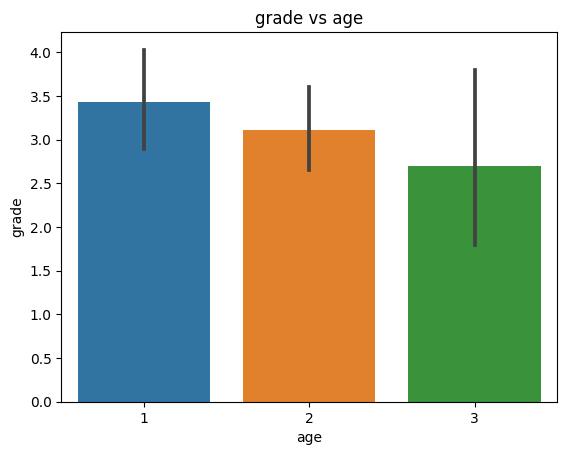

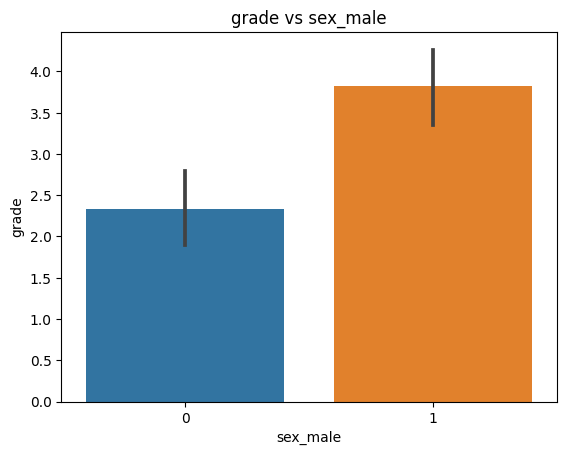

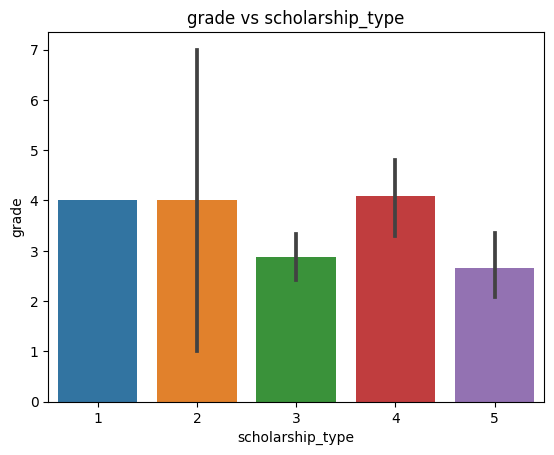

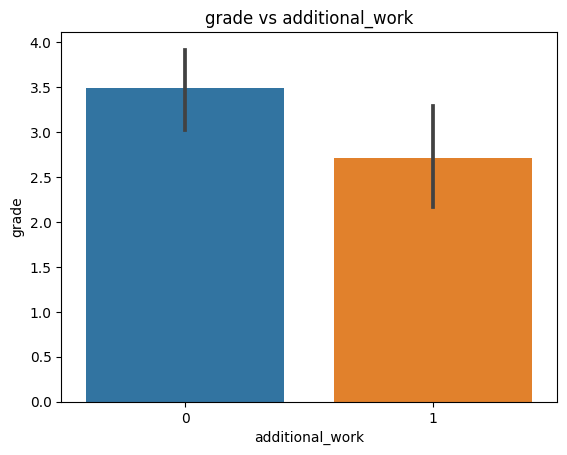

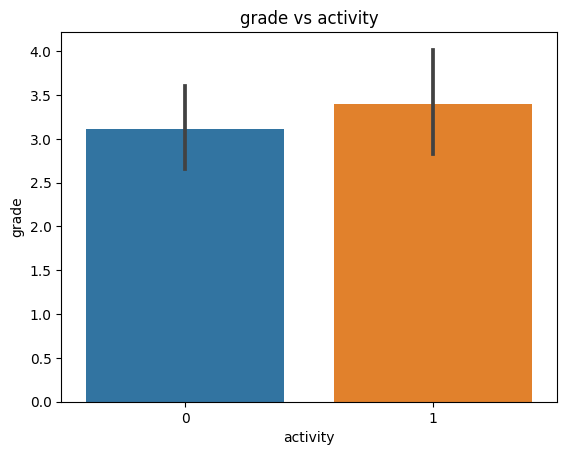

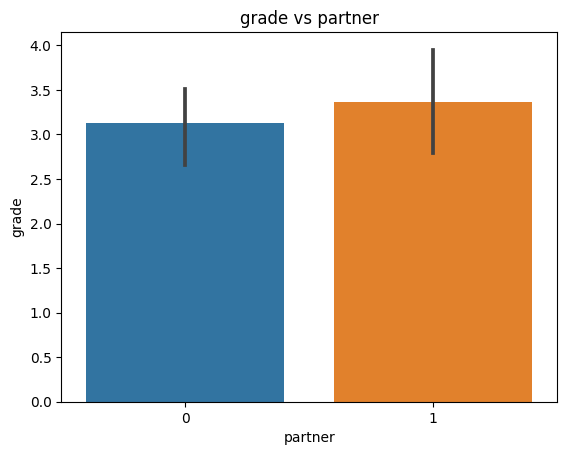

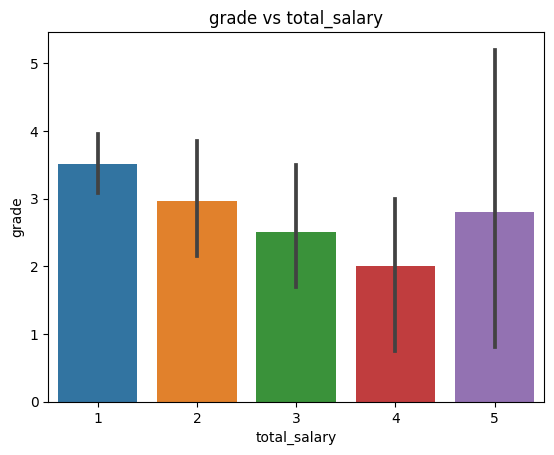

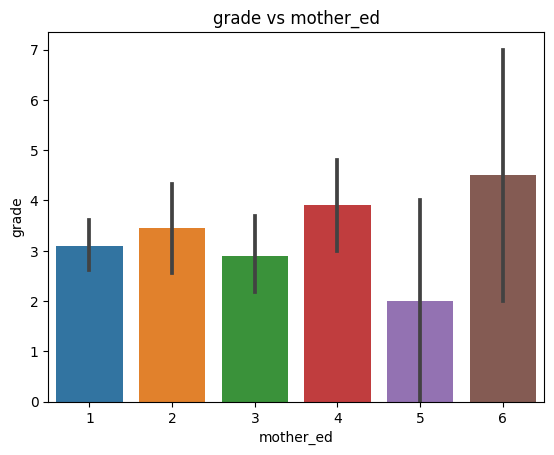

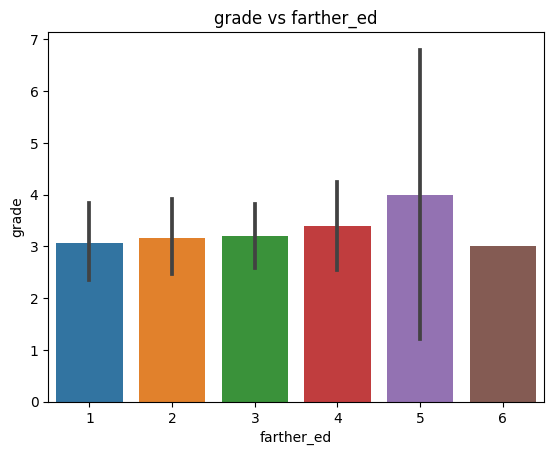

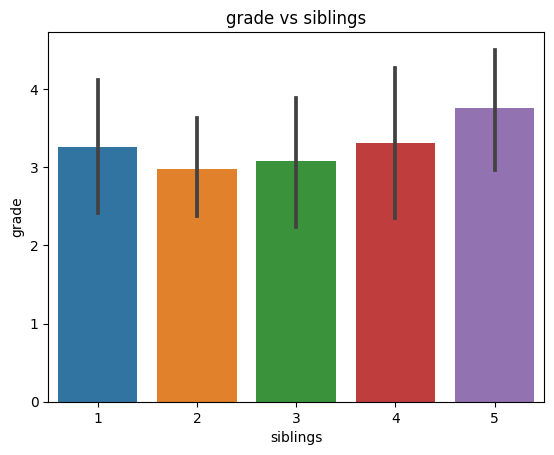

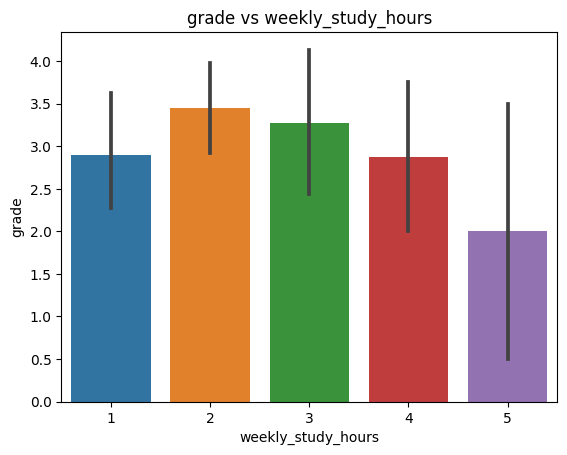

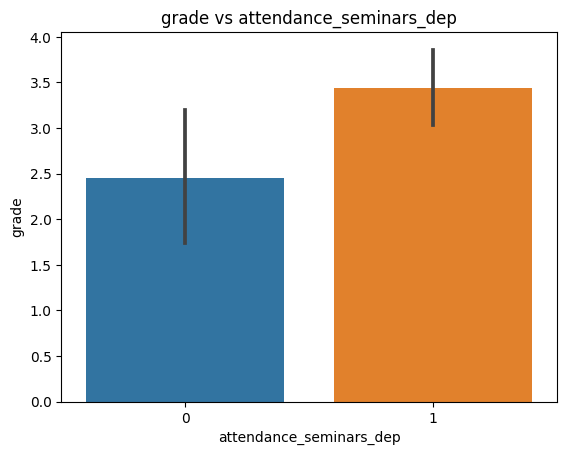

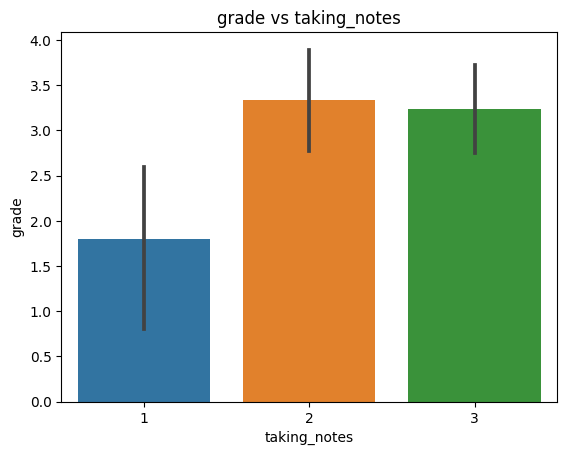

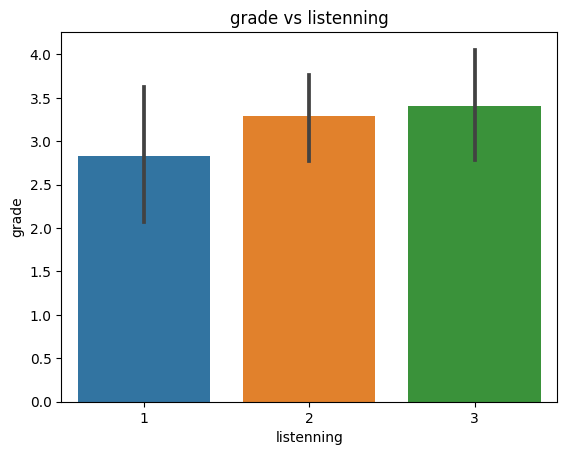

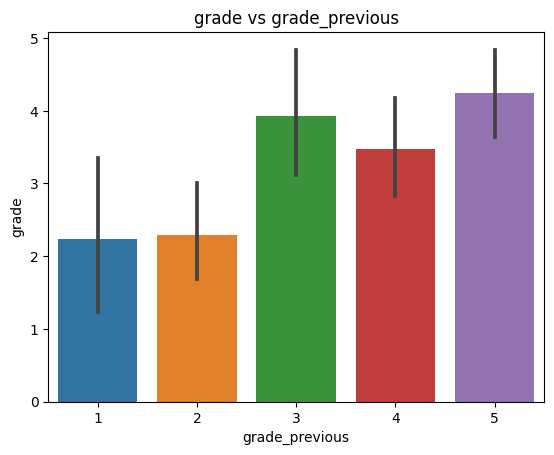

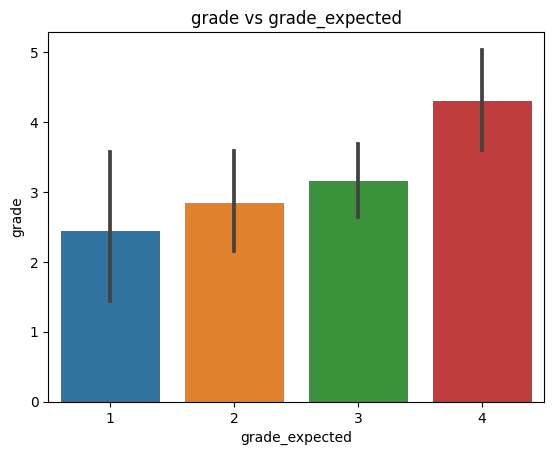

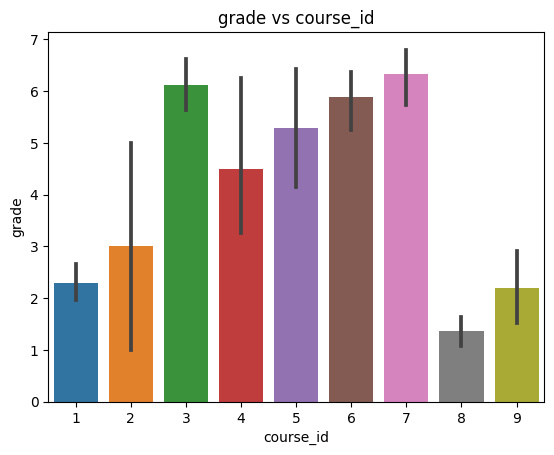

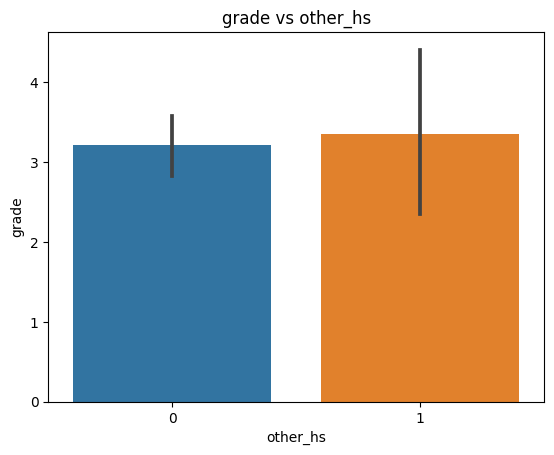

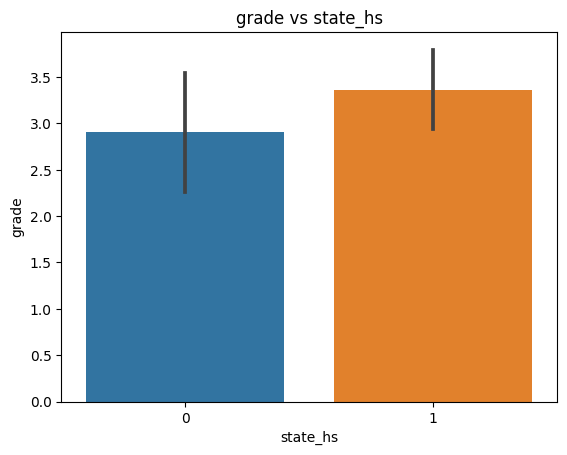

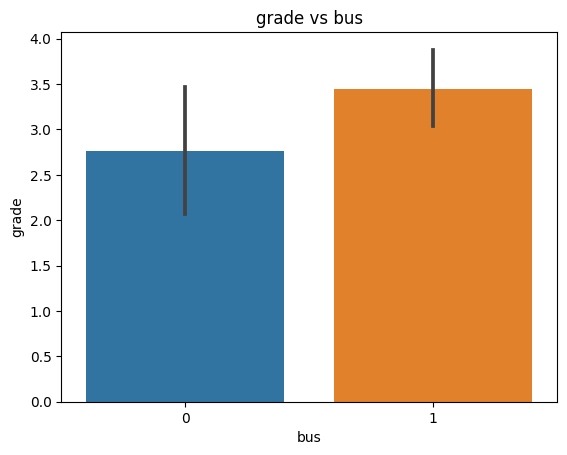

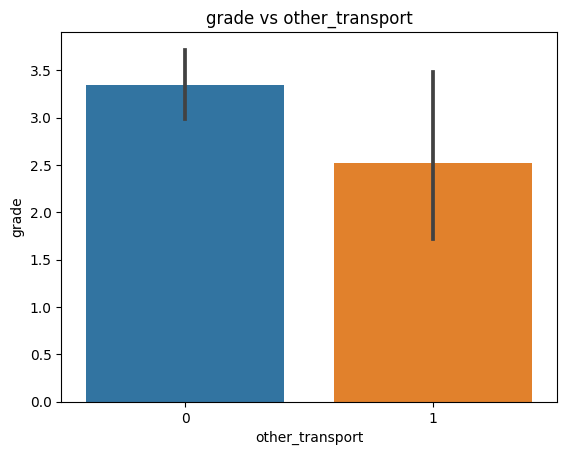

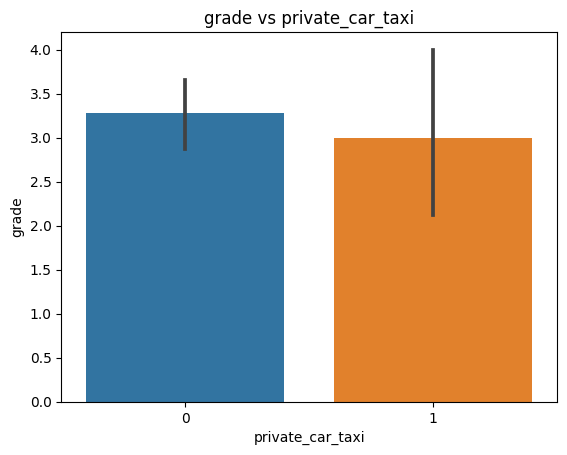

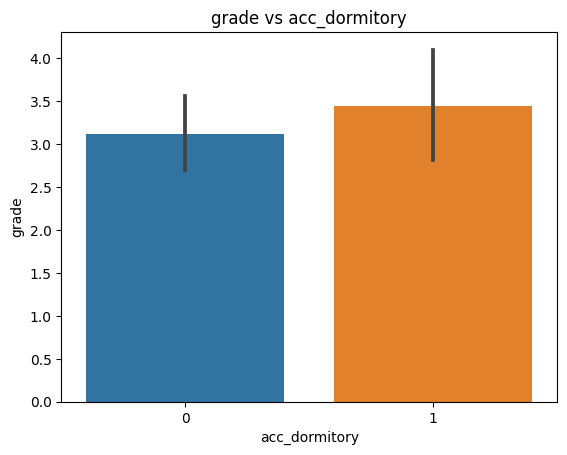

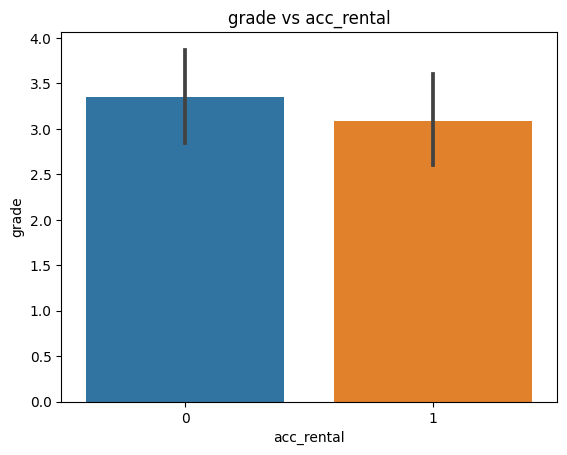

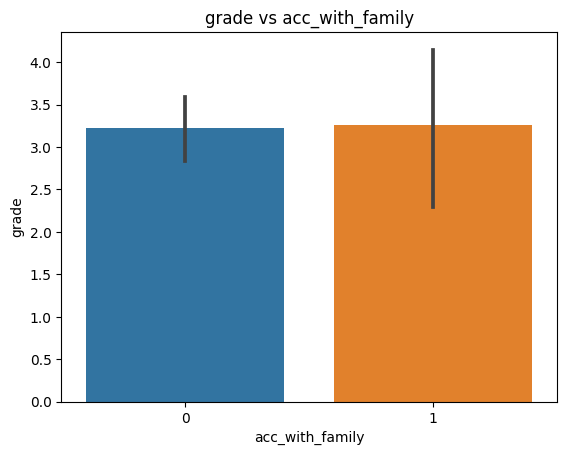

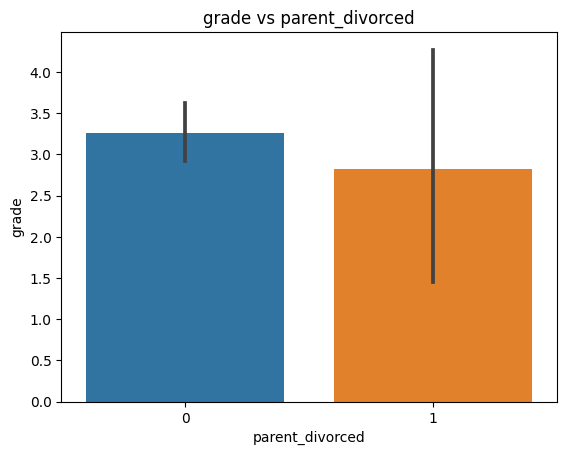

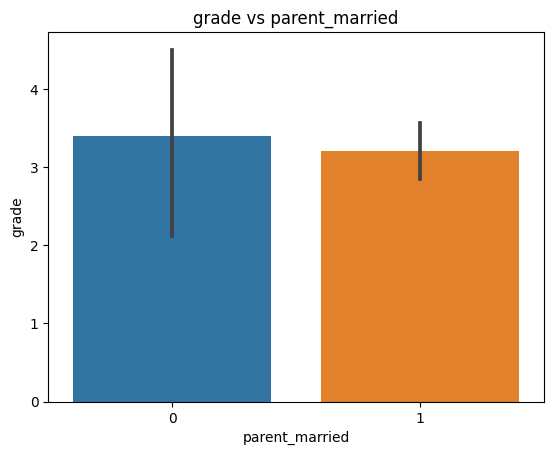

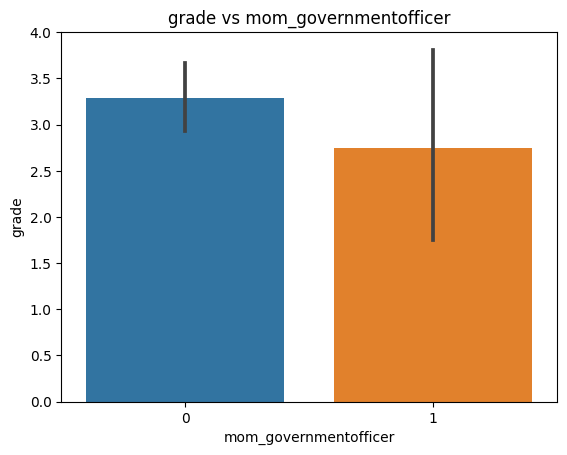

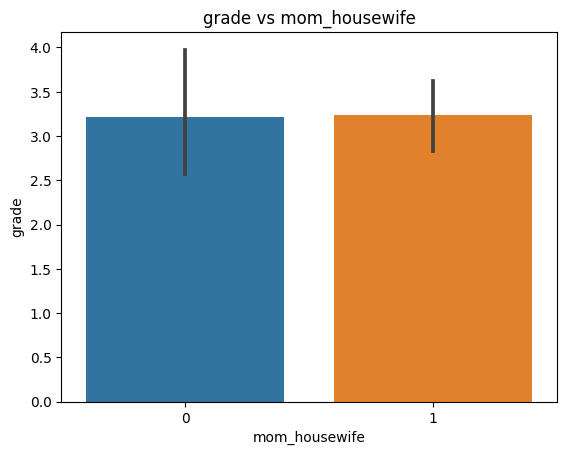

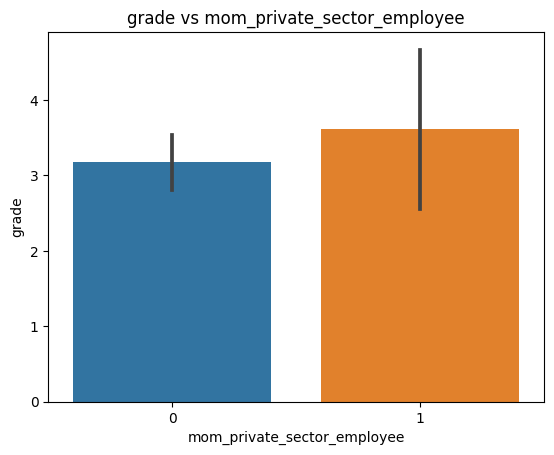

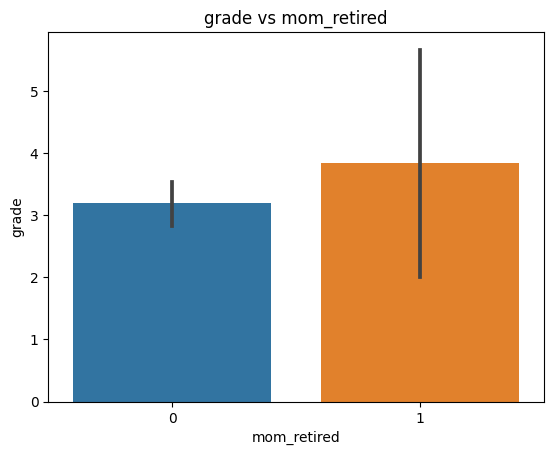

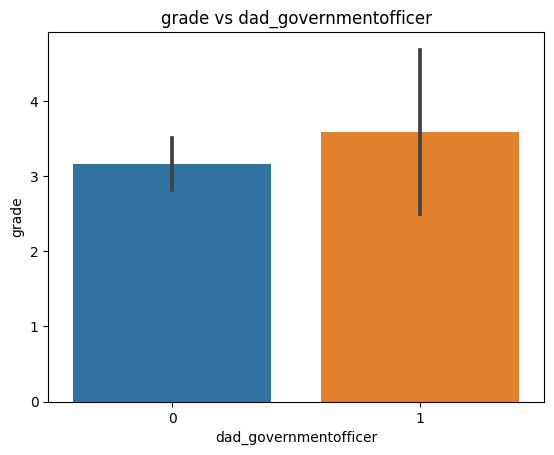

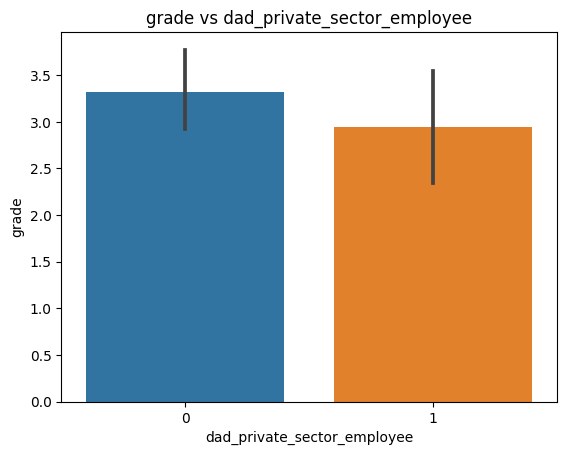

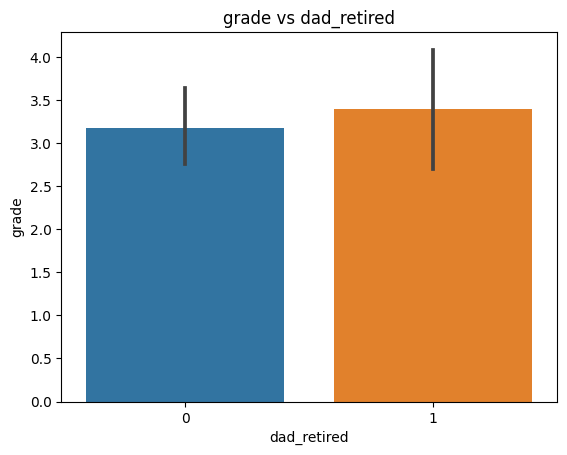

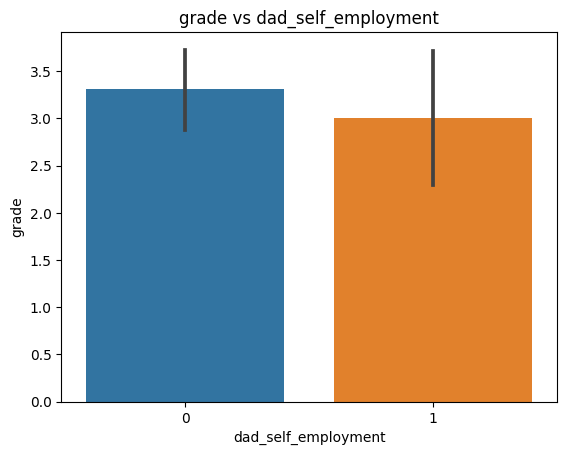

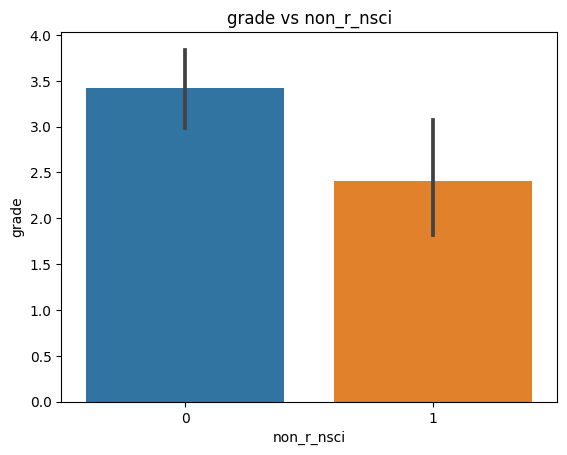

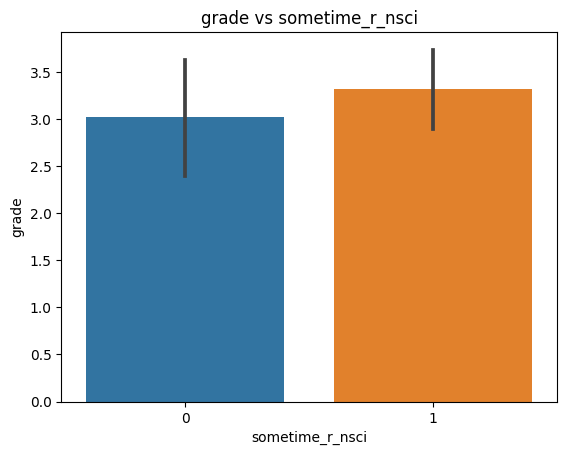

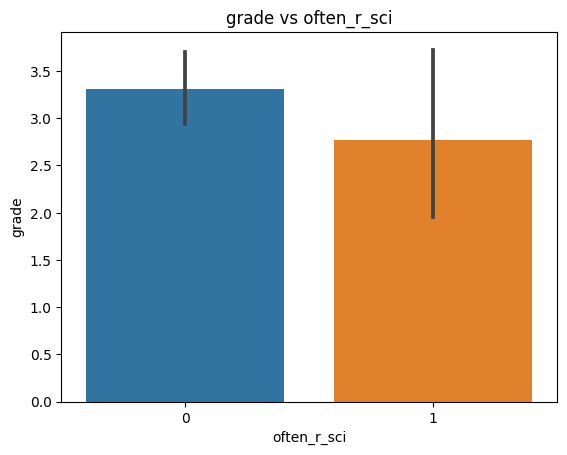

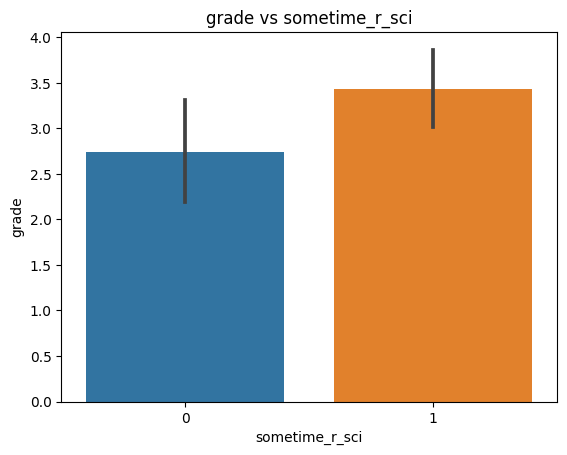

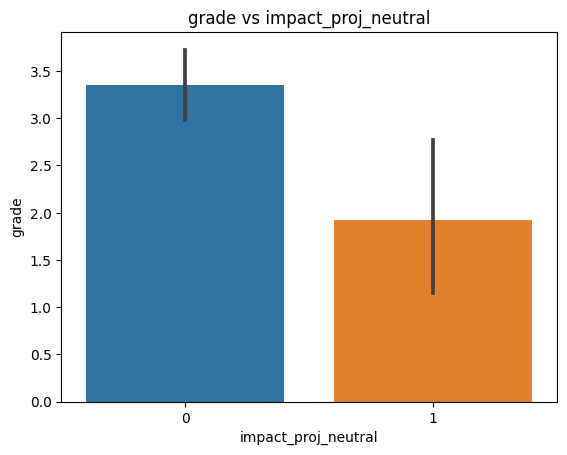

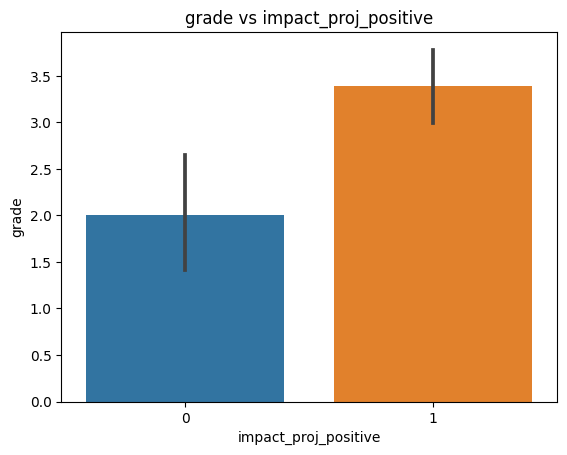

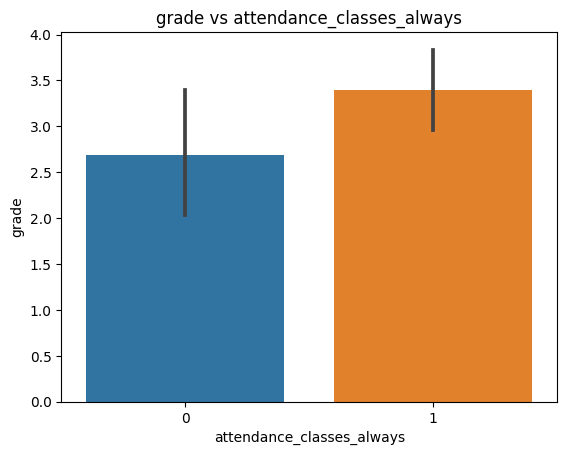

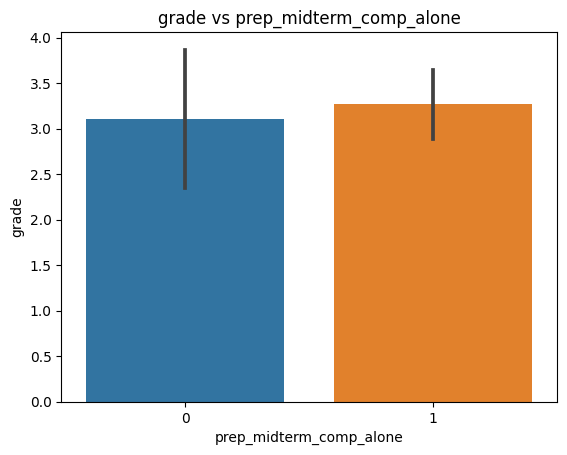

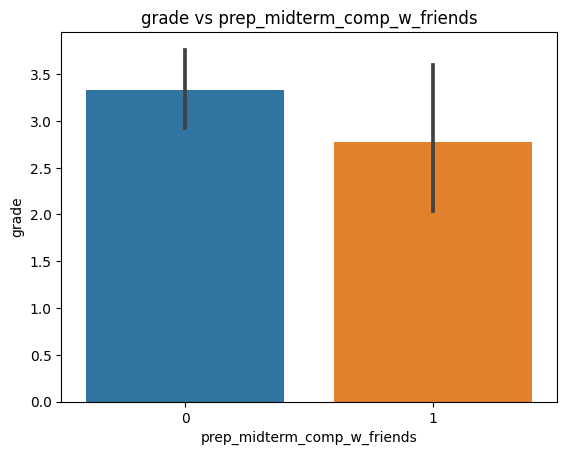

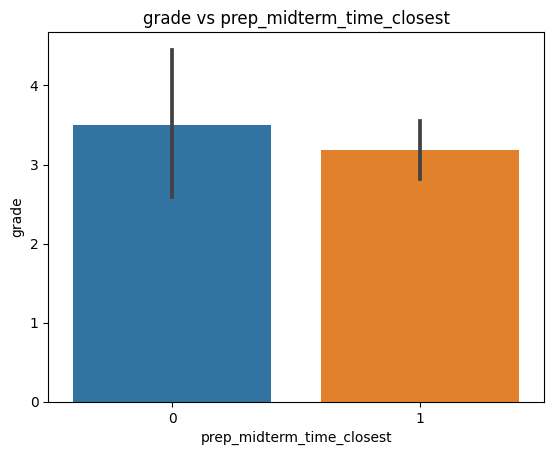

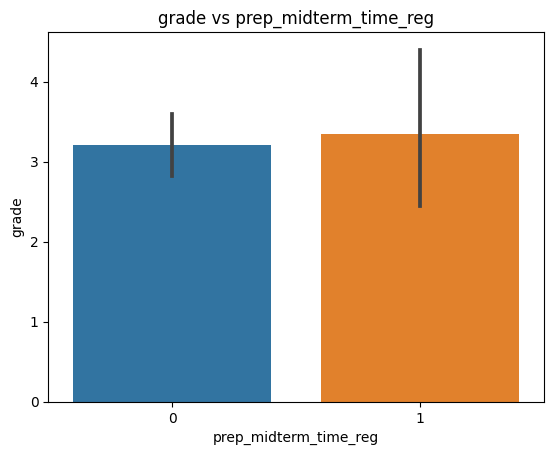

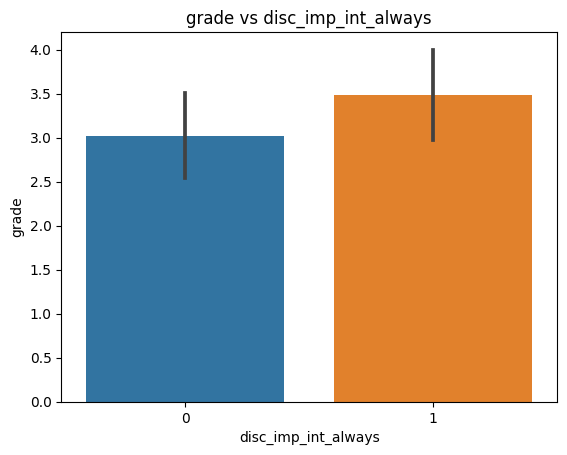

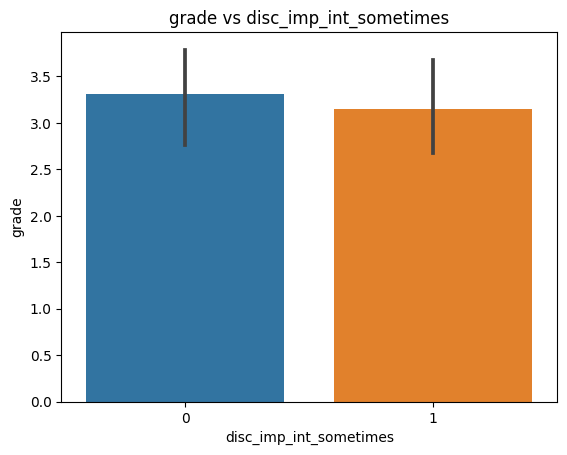

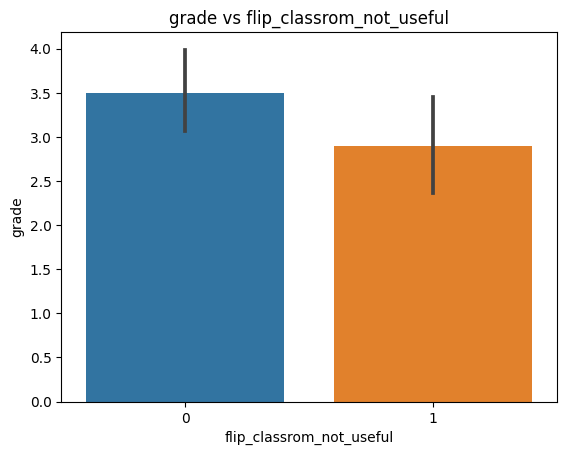

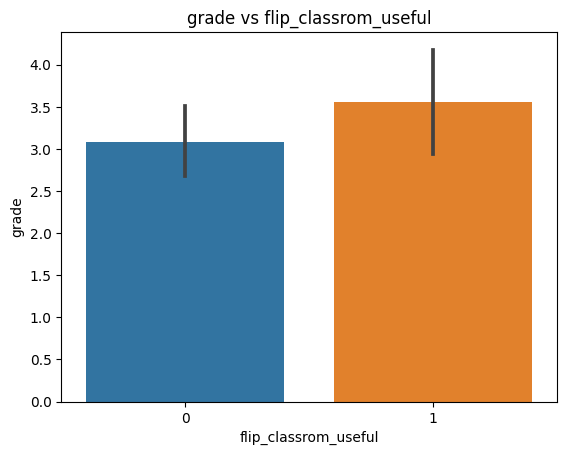

In [ ]:
for columna in columnas_sin_grade:
    sns.barplot(x=df[columna], y=df['grade'])
    plt.xlabel(columna)
    plt.ylabel('grade')
    plt.title(f'grade vs {columna}')
    plt.show()

### Insights:

Algunos de los insights que pude observar son:
- A mas edad la media de las notas es más baja, pero también el rango es más amplio.
- Se ve un mejor resultado promedio cuando el estudiante tiene beca de 25%, pero por otra parte es más dispersio, siendo más homogeneo en el caso de tener becas de más porcentaje.
- Aunque va contra lo que uno pensaría, a mayor cantidad de hermanos, la media, rango y min-max de las calificaciones, suben.
- La cantidad de horas semanales de estudio que mejor resultado tienen son las de rango 2: <5hrs.
- Si no se toman notas en clases, las calificaciones son considerablemente más bajas.
- Leer articulos, ya sean cientificos o no, ayuda a mejorar el rendimiento.
- El impacto de proyecto es un buen indicador de resultado en la calificación.

## Generación del modelo

### Preprocesamiento

In [3]:
df_ver2 = pd.read_csv('datos_limpios.csv') #Hice esto para no tener que hacer correr nuevamente todos los códigos de arriba en caso de volver a trabajar con este proyecto.

#### Definición de features y variable objetivo

In [4]:
X = df_ver2[['age', 'sex_male', 'scholarship_type', 'additional_work', 'activity',
       'partner', 'total_salary', 'mother_ed', 'farther_ed', 'siblings',
       'weekly_study_hours', 'attendance_seminars_dep', 'taking_notes',
       'listenning', 'grade_previous', 'grade_expected', 'course_id',
       'other_hs', 'state_hs', 'bus', 'other_transport', 'private_car_taxi',
       'acc_dormitory', 'acc_rental', 'acc_with_family', 'parent_divorced',
       'parent_married', 'mom_governmentofficer', 'mom_housewife',
       'mom_private_sector_employee', 'mom_retired', 'dad_governmentofficer',
       'dad_private_sector_employee', 'dad_retired', 'dad_self_employment',
       'non_r_nsci', 'sometime_r_nsci', 'often_r_sci', 'sometime_r_sci',
       'impact_proj_neutral', 'impact_proj_positive',
       'attendance_classes_always', 'prep_midterm_comp_alone',
       'prep_midterm_comp_w_friends', 'prep_midterm_time_closest',
       'prep_midterm_time_reg', 'disc_imp_int_always',
       'disc_imp_int_sometimes', 'flip_classrom_not_useful',
       'flip_classrom_useful']]
y = df_ver2['grade']

In [5]:
X.shape

(145, 50)

In [6]:
X.head(5)

,age,sex_male,scholarship_type,additional_work,activity,partner,total_salary,mother_ed,farther_ed,siblings,weekly_study_hours,attendance_seminars_dep,taking_notes,listenning,grade_previous,grade_expected,course_id,other_hs,state_hs,bus,other_transport,private_car_taxi,acc_dormitory,acc_rental,acc_with_family,parent_divorced,parent_married,mom_governmentofficer,mom_housewife,mom_private_sector_employee,mom_retired,dad_governmentofficer,dad_private_sector_employee,dad_retired,dad_self_employment,non_r_nsci,sometime_r_nsci,often_r_sci,sometime_r_sci,impact_proj_neutral,impact_proj_positive,attendance_classes_always,prep_midterm_comp_alone,prep_midterm_comp_w_friends,prep_midterm_time_closest,prep_midterm_time_reg,disc_imp_int_always,disc_imp_int_sometimes,flip_classrom_not_useful,flip_classrom_useful
0,2,1,3,1,0,0,1,1,2,3,3,1,3,2,1,1,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1
1,2,1,3,1,0,0,1,2,3,2,2,1,3,2,2,3,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,1,0,1,0,0,1
2,2,1,3,0,0,0,2,2,2,2,2,1,2,2,2,2,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,1,0,1,0,0,0,1,0
3,1,0,3,1,0,1,2,1,2,5,3,1,3,2,3,2,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,1,0,0,1,0,1,1,0
4,2,1,3,0,0,1,3,3,3,2,2,1,2,2,2,2,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,0


In [7]:
y.value_counts()

1    35
2    24
3    21
5    17
7    17
6    13
4    10
0     8
Name: grade, dtype: int64

#### Escalamiento

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
X_scaled = X.copy()

In [11]:
#Transformo solo la variables no binarias para mantener esa binariedad.
X_scaled[['age', 'scholarship_type', 'total_salary', 'mother_ed', 'farther_ed', 'siblings', 'weekly_study_hours', 'taking_notes', 'listenning', 'grade_previous', 'grade_expected', 'course_id']] = scaler.fit_transform(X[['age', 'scholarship_type', 'total_salary', 'mother_ed', 'farther_ed', 'siblings', 'weekly_study_hours', 'taking_notes', 'listenning', 'grade_previous', 'grade_expected', 'course_id']])

In [12]:
X_scaled.head(5)

,age,sex_male,scholarship_type,additional_work,activity,partner,total_salary,mother_ed,farther_ed,siblings,weekly_study_hours,attendance_seminars_dep,taking_notes,listenning,grade_previous,grade_expected,course_id,other_hs,state_hs,bus,other_transport,private_car_taxi,acc_dormitory,acc_rental,acc_with_family,parent_divorced,parent_married,mom_governmentofficer,mom_housewife,mom_private_sector_employee,mom_retired,dad_governmentofficer,dad_private_sector_employee,dad_retired,dad_self_employment,non_r_nsci,sometime_r_nsci,often_r_sci,sometime_r_sci,impact_proj_neutral,impact_proj_positive,attendance_classes_always,prep_midterm_comp_alone,prep_midterm_comp_w_friends,prep_midterm_time_closest,prep_midterm_time_reg,disc_imp_int_always,disc_imp_int_sometimes,flip_classrom_not_useful,flip_classrom_useful
0,0.620766,1,-0.712873,1,0,0,-0.617265,-1.052444,-0.554821,0.142413,0.875029,1,0.808493,-0.082052,-1.638252,-1.887666,-0.963726,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1
1,0.620766,1,-0.712873,1,0,0,-0.617265,-0.231990,0.319625,-0.595083,-0.218757,1,0.808493,-0.082052,-0.866997,0.302027,-0.963726,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,1,0,1,0,0,1
2,0.620766,1,-0.712873,0,0,0,0.366289,-0.231990,-0.554821,-0.595083,-0.218757,1,-0.967742,-0.082052,-0.866997,-0.792820,-0.963726,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,1,0,1,0,0,0,1,0
3,-1.015799,0,-0.712873,1,0,1,0.366289,-1.052444,-0.554821,1.617405,0.875029,1,0.808493,-0.082052,-0.095742,-0.792820,-0.963726,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,1,0,0,1,0,1,1,0
4,0.620766,1,-0.712873,0,0,1,1.349843,0.588464,0.319625,-0.595083,-0.218757,1,-0.967742,-0.082052,-0.866997,-0.792820,-0.963726,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,0


In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_dum = to_categorical(y)

In [15]:
y_dum

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#### Balanceo de datos

In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X_scaled, y_dum)

In [18]:
X_resampled.shape

(280, 50)

In [19]:
y_resampled.shape

(280, 8)

#### Validación cruzada

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=101)

In [21]:
X_train.shape

(224, 50)

In [22]:
X_test.shape

(56, 50)

In [23]:
y_train.shape

(224, 8)

In [24]:
y_test.shape

(56, 8)

### Probando algunas arquitecturas

In [25]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [26]:
X.shape

(145, 50)

In [27]:
y_dum.shape

(145, 8)

#### Arquitectura 1: Fully connected

En esta primera arquitectura intentaremos una arquitectura fully connected con 5 capas:


1.   Input vector con 50 nodos.
2.   Hidden layer 1, 512 nodos, función de activación **ReLu**.
3.   Capa de regularización, **dropout 0.2**.
4.   Hidden layer 2, 512 nodos, función de activación **ReLu**.
5.   Hidden layer 3, 8 nodos, función de activación **softmax**.

con un optimizador **adam** y learning rate de 0.001.



In [28]:
model = Sequential()
model.add(Input(shape=(50,)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dense(8, activation='softmax'))

In [29]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'] )

In [30]:
# Entrenamiento
history = model.fit(X_train, y_train, epochs=50, batch_size=128, verbose=2, validation_data=(X_test, y_test))

Epoch 1/50
2/2 - 1s - loss: 2.0701 - accuracy: 0.1741 - val_loss: 1.9444 - val_accuracy: 0.3571 - 1s/epoch - 691ms/step
Epoch 2/50
2/2 - 0s - loss: 1.8507 - accuracy: 0.5268 - val_loss: 1.8412 - val_accuracy: 0.3929 - 61ms/epoch - 31ms/step
Epoch 3/50
2/2 - 0s - loss: 1.6731 - accuracy: 0.6071 - val_loss: 1.7261 - val_accuracy: 0.4107 - 55ms/epoch - 28ms/step
Epoch 4/50
2/2 - 0s - loss: 1.4782 - accuracy: 0.6964 - val_loss: 1.6304 - val_accuracy: 0.4643 - 61ms/epoch - 30ms/step
Epoch 5/50
2/2 - 0s - loss: 1.3401 - accuracy: 0.7054 - val_loss: 1.5447 - val_accuracy: 0.5179 - 56ms/epoch - 28ms/step
Epoch 6/50
2/2 - 0s - loss: 1.1857 - accuracy: 0.7366 - val_loss: 1.4888 - val_accuracy: 0.5000 - 59ms/epoch - 29ms/step
Epoch 7/50
2/2 - 0s - loss: 1.0620 - accuracy: 0.7321 - val_loss: 1.4472 - val_accuracy: 0.5536 - 274ms/epoch - 137ms/step
Epoch 8/50
2/2 - 0s - loss: 0.9383 - accuracy: 0.7768 - val_loss: 1.4189 - val_accuracy: 0.5536 - 56ms/epoch - 28ms/step
Epoch 9/50
2/2 - 0s - loss: 0.8

In [31]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##### Evaluación y métricas arquitectura 1

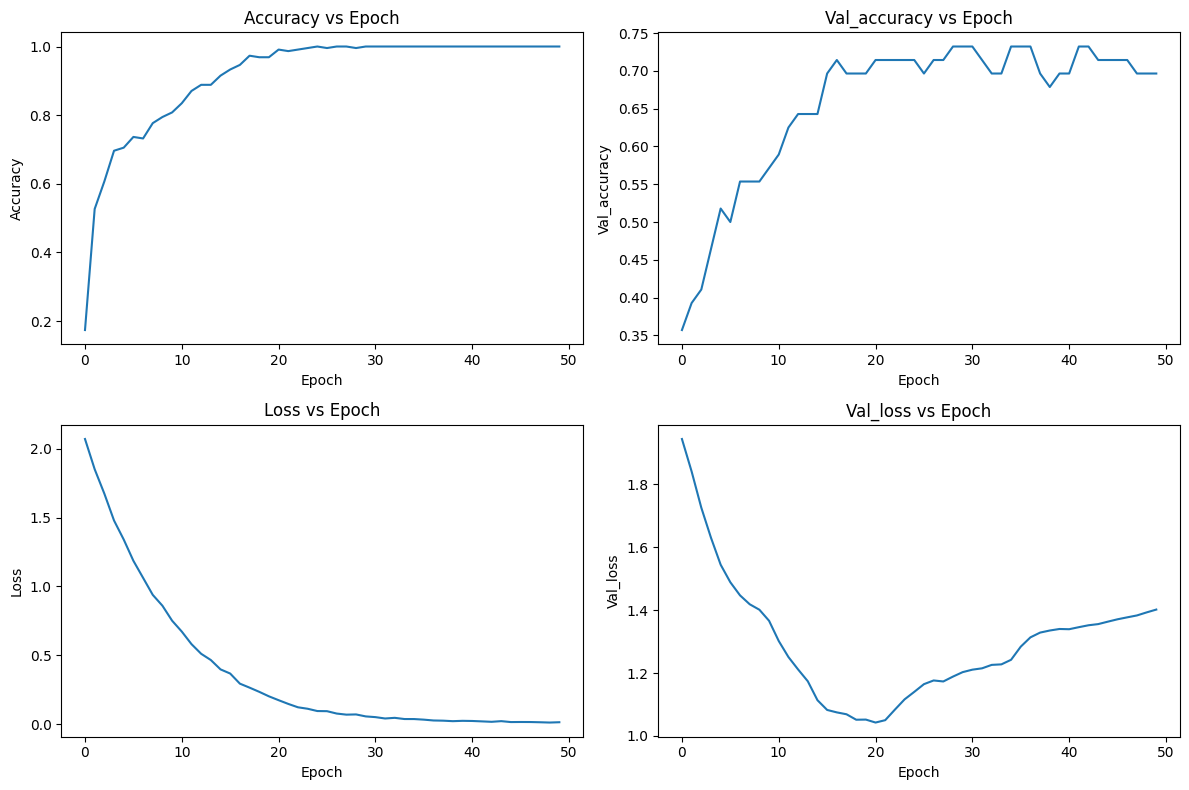

In [32]:
# Crear figura y subtramas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Accuracy vs Epoch
axes[0, 0].plot(history.history['accuracy'], label='accuracy')
axes[0, 0].set_title('Accuracy vs Epoch')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')

# Val_accuracy vs Epoch
axes[0, 1].plot(history.history['val_accuracy'], label='val_accuracy')
axes[0, 1].set_title('Val_accuracy vs Epoch')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Val_accuracy')

# Loss vs Epoch
axes[1, 0].plot(history.history['loss'], label='loss')
axes[1, 0].set_title('Loss vs Epoch')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')

# Val_loss vs Epoch
axes[1, 1].plot(history.history['val_loss'], label='val_loss')
axes[1, 1].set_title('Val_loss vs Epoch')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Val_loss')

# Ajustar espaciado entre subtramas
plt.tight_layout()

# Mostrar la figura
plt.show()

El gráfico de val_accuracy vs epoch muestra que quizás debería bajar la cantidad de epoch para evitar un sobreajuste.

In [33]:
from sklearn.metrics import accuracy_score
import numpy as np

In [34]:
y_pred_1 = model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [35]:
y_pred_1_clases = np.argmax(y_pred_1,axis=1)

In [36]:
y_test_clases = np.argmax(y_test,axis=1)

In [37]:
accuracy_score(y_pred_1_clases,y_test_clases)

0.6964285714285714

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               26112     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 292,872
Trainable params: 292,872
Non-trainable params: 0
_________________________________________________________________


#### Arquitectura 2: Fully connected

En esta segunda arquitectura intentaremos mejorar la arquitectura fully connected del modelo anterior, bajando el n° de epoch y agregando una capa de regulareización, de la siguiente manera:


1.   Input vector con 50 nodos.
2.   Hidden layer 1, 512 nodos, función de activación **ReLu**.
3.   Capa de regularización, **dropout 0.3**.
4.   Hidden layer 2, 512 nodos, función de activación **ReLu**.
5.   Capa de regularización, **dropout 0.2**
6.   Hidden layer 3, 512 nodos, función de activación **ReLu**.
7.   Hidden layer 4, 8 nodos, función de activación **softmax**.

con un optimizador **adam** y learning rate de 0.001.

In [39]:
model_2 = Sequential()
model_2.add(Input(shape=(50,)))
model_2.add(Dense(512, activation='relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(512, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(512, activation='relu'))
model_2.add(Dense(8, activation='softmax'))

In [40]:
model_2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'] )

In [41]:
history_2 = model_2.fit(X_train, y_train, epochs=40, batch_size=128, verbose=2, validation_data=(X_test, y_test))

Epoch 1/40
2/2 - 1s - loss: 2.0796 - accuracy: 0.1250 - val_loss: 2.0224 - val_accuracy: 0.3036 - 1s/epoch - 620ms/step
Epoch 2/40
2/2 - 0s - loss: 1.9223 - accuracy: 0.3705 - val_loss: 1.9400 - val_accuracy: 0.4286 - 67ms/epoch - 33ms/step
Epoch 3/40
2/2 - 0s - loss: 1.7805 - accuracy: 0.5089 - val_loss: 1.7903 - val_accuracy: 0.4643 - 69ms/epoch - 34ms/step
Epoch 4/40
2/2 - 0s - loss: 1.6193 - accuracy: 0.6384 - val_loss: 1.5852 - val_accuracy: 0.5179 - 80ms/epoch - 40ms/step
Epoch 5/40
2/2 - 0s - loss: 1.4606 - accuracy: 0.6473 - val_loss: 1.4655 - val_accuracy: 0.5179 - 66ms/epoch - 33ms/step
Epoch 6/40
2/2 - 0s - loss: 1.2834 - accuracy: 0.6205 - val_loss: 1.4226 - val_accuracy: 0.5179 - 77ms/epoch - 38ms/step
Epoch 7/40
2/2 - 0s - loss: 1.0864 - accuracy: 0.6875 - val_loss: 1.3944 - val_accuracy: 0.5536 - 83ms/epoch - 42ms/step
Epoch 8/40
2/2 - 0s - loss: 0.9947 - accuracy: 0.7009 - val_loss: 1.3546 - val_accuracy: 0.5714 - 86ms/epoch - 43ms/step
Epoch 9/40
2/2 - 0s - loss: 0.862

##### Evaluación y métricas arquitectura 2


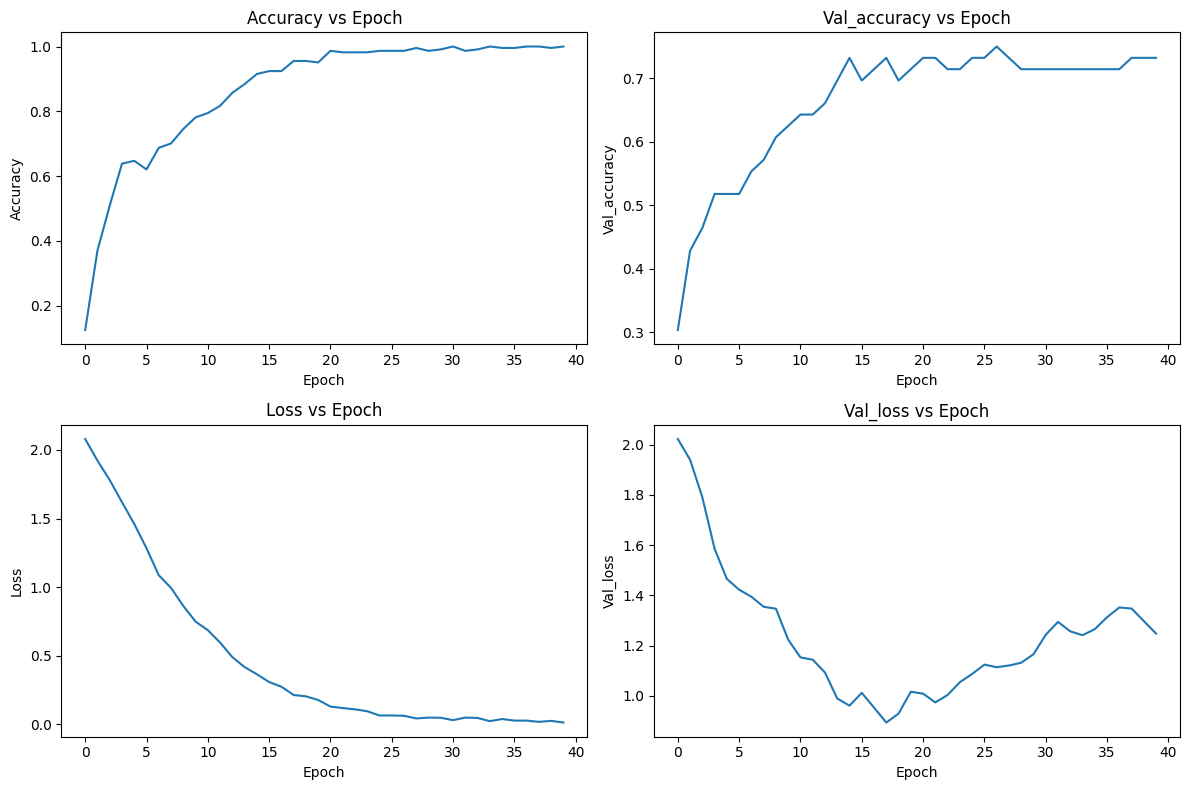

In [42]:
# Crear figura y subtramas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Accuracy vs Epoch
axes[0, 0].plot(history_2.history['accuracy'], label='accuracy')
axes[0, 0].set_title('Accuracy vs Epoch')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')

# Val_accuracy vs Epoch
axes[0, 1].plot(history_2.history['val_accuracy'], label='val_accuracy')
axes[0, 1].set_title('Val_accuracy vs Epoch')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Val_accuracy')

# Loss vs Epoch
axes[1, 0].plot(history_2.history['loss'], label='loss')
axes[1, 0].set_title('Loss vs Epoch')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')

# Val_loss vs Epoch
axes[1, 1].plot(history_2.history['val_loss'], label='val_loss')
axes[1, 1].set_title('Val_loss vs Epoch')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Val_loss')

# Ajustar espaciado entre subtramas
plt.tight_layout()

# Mostrar la figura
plt.show()

In [43]:
y_pred_2 = model_2.predict(X_test)
y_pred_2_clases = np.argmax(y_pred_2,axis=1)
accuracy_score(y_pred_2_clases,y_test_clases)

2/2 [==============================] - 0s 7ms/step


0.7321428571428571

No hubo mucha mejoría respecto al accuracy del modelo a pesar de agregar capas y evitar un poco el sobreajuste regulando con el dropout; por lo que los siguientes modelos los intentaré con CNN.

In [44]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               26112     
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 555,528
Trainable params: 555,528
Non-tr

#### Arquitectura 3: Fully connected

En esta tercera arquitectura intentaremos modificar la arquitectura fully connected del modelo anterior, cambiando el optimizador, de la siguiente manera:


1.   Input vector con 50 nodos.
2.   Hidden layer 1, 512 nodos, función de activación **ReLu**.
3.   Capa de regularización, **dropout 0.3**.
4.   Hidden layer 2, 512 nodos, función de activación **ReLu**.
5.   Capa de regularización, **dropout 0.2**
6.   Hidden layer 3, 512 nodos, función de activación **ReLu**.
7.   Hidden layer 4, 8 nodos, función de activación **softmax**.

con un optimizador **RMSprop**.

In [45]:
from tensorflow.keras.optimizers import RMSprop

In [46]:
model_3 = Sequential()
model_3.add(Input(shape=(50,)))
model_3.add(Dense(512, activation='relu'))
model_3.add(Dropout(0.3))
model_3.add(Dense(512, activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(512, activation='relu'))
model_3.add(Dense(8, activation='softmax'))

In [47]:
model_3.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'] )

In [48]:
history_3 = model_3.fit(X_train, y_train, epochs=40, batch_size=128, verbose=2, validation_data=(X_test, y_test))

Epoch 1/40
2/2 - 1s - loss: 2.1049 - accuracy: 0.1071 - val_loss: 1.9819 - val_accuracy: 0.2143 - 994ms/epoch - 497ms/step
Epoch 2/40
2/2 - 0s - loss: 1.8786 - accuracy: 0.3750 - val_loss: 1.7547 - val_accuracy: 0.4286 - 66ms/epoch - 33ms/step
Epoch 3/40
2/2 - 0s - loss: 1.6691 - accuracy: 0.4643 - val_loss: 1.5685 - val_accuracy: 0.4821 - 71ms/epoch - 36ms/step
Epoch 4/40
2/2 - 0s - loss: 1.5059 - accuracy: 0.5134 - val_loss: 1.5475 - val_accuracy: 0.3929 - 83ms/epoch - 42ms/step
Epoch 5/40
2/2 - 0s - loss: 1.2931 - accuracy: 0.5938 - val_loss: 1.3889 - val_accuracy: 0.5000 - 82ms/epoch - 41ms/step
Epoch 6/40
2/2 - 0s - loss: 1.1289 - accuracy: 0.6696 - val_loss: 1.5347 - val_accuracy: 0.5536 - 88ms/epoch - 44ms/step
Epoch 7/40
2/2 - 0s - loss: 1.0920 - accuracy: 0.6786 - val_loss: 1.3607 - val_accuracy: 0.5714 - 75ms/epoch - 37ms/step
Epoch 8/40
2/2 - 0s - loss: 1.0267 - accuracy: 0.6339 - val_loss: 1.1569 - val_accuracy: 0.6071 - 67ms/epoch - 34ms/step
Epoch 9/40
2/2 - 0s - loss: 0.

##### Evaluación y métricas arquitectura 3

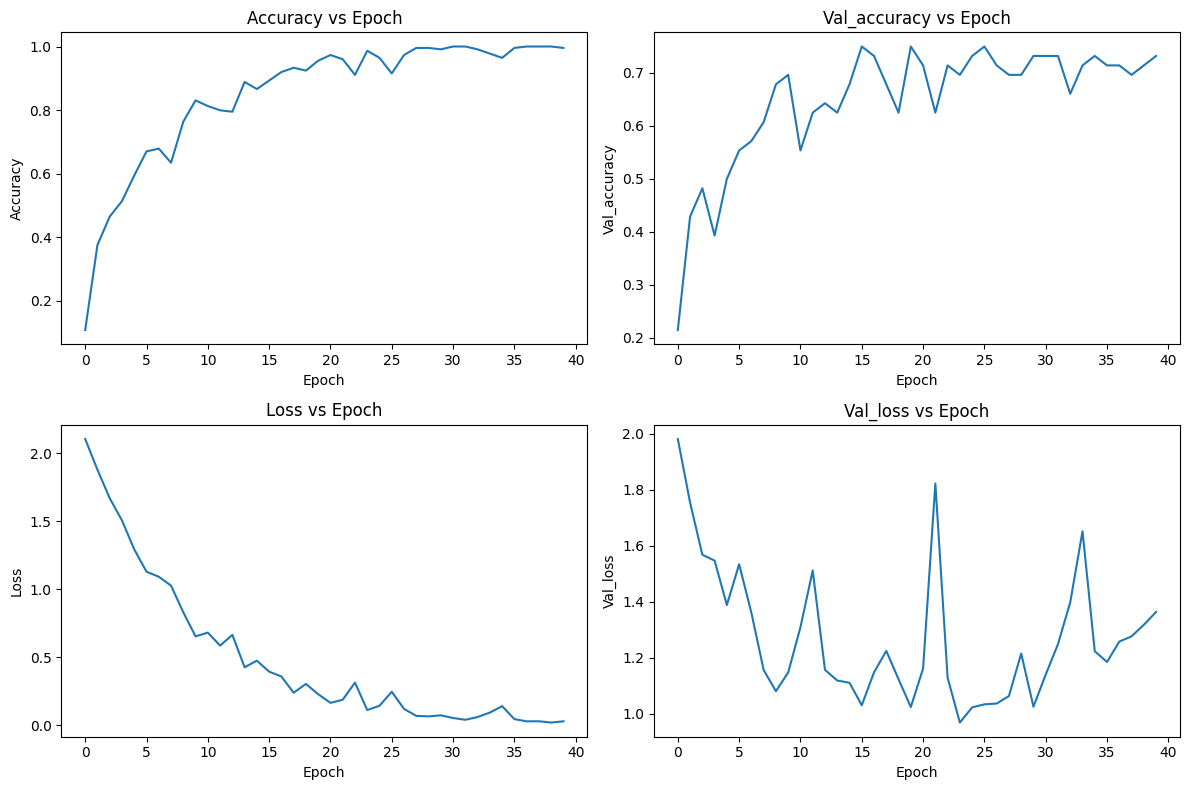

In [49]:
# Crear figura y subtramas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Accuracy vs Epoch
axes[0, 0].plot(history_3.history['accuracy'], label='accuracy')
axes[0, 0].set_title('Accuracy vs Epoch')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')

# Val_accuracy vs Epoch
axes[0, 1].plot(history_3.history['val_accuracy'], label='val_accuracy')
axes[0, 1].set_title('Val_accuracy vs Epoch')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Val_accuracy')

# Loss vs Epoch
axes[1, 0].plot(history_3.history['loss'], label='loss')
axes[1, 0].set_title('Loss vs Epoch')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')

# Val_loss vs Epoch
axes[1, 1].plot(history_3.history['val_loss'], label='val_loss')
axes[1, 1].set_title('Val_loss vs Epoch')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Val_loss')

# Ajustar espaciado entre subtramas
plt.tight_layout()

# Mostrar la figura
plt.show()

In [50]:
y_pred_3 = model_3.predict(X_test)
y_pred_3_clases = np.argmax(y_pred_3,axis=1)
accuracy_score(y_pred_3_clases,y_test_clases)

2/2 [==============================] - 0s 7ms/step


0.7321428571428571

In [51]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               26112     
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dense_10 (Dense)            (None, 8)                 4104      
                                                                 
Total params: 555,528
Trainable params: 555,528
Non-tr

#### Arquitectura 4: Fully connected

En esta cuarta arquitectura intentaremos modificar la arquitectura fully connected del modelo anterior, cambiando las funciones de activación, de la siguiente manera:


1.   Input vector con 50 nodos.
2.   Hidden layer 1, 512 nodos, función de activación **LeakyReLU**.
3.   Capa de regularización, **dropout 0.3**.
4.   Hidden layer 2, 512 nodos, función de activación **LeakyReLU**.
5.   Capa de regularización, **dropout 0.2**
6.   Hidden layer 3, 512 nodos, función de activación **LeakyReLU**.
7.   Hidden layer 4, 8 nodos, función de activación **softmax**.

con un optimizador **RMSprop**.

In [52]:
model_4 = Sequential()
model_4.add(Input(shape=(50,)))
model_4.add(Dense(512, activation='LeakyReLU'))
model_4.add(Dropout(0.3))
model_4.add(Dense(512, activation='LeakyReLU'))
model_4.add(Dropout(0.2))
model_4.add(Dense(512, activation='LeakyReLU'))
model_4.add(Dense(8, activation='softmax'))

In [53]:
model_4.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'] )

In [54]:
history_4 = model_4.fit(X_train, y_train, epochs=40, batch_size=128, verbose=2, validation_data=(X_test, y_test))

Epoch 1/40
2/2 - 1s - loss: 2.0547 - accuracy: 0.1473 - val_loss: 1.7710 - val_accuracy: 0.3750 - 1s/epoch - 548ms/step
Epoch 2/40
2/2 - 0s - loss: 1.6647 - accuracy: 0.4688 - val_loss: 1.5347 - val_accuracy: 0.4464 - 85ms/epoch - 43ms/step
Epoch 3/40
2/2 - 0s - loss: 1.3763 - accuracy: 0.6071 - val_loss: 1.5875 - val_accuracy: 0.4464 - 69ms/epoch - 34ms/step
Epoch 4/40
2/2 - 0s - loss: 1.3143 - accuracy: 0.5536 - val_loss: 1.3247 - val_accuracy: 0.5357 - 67ms/epoch - 34ms/step
Epoch 5/40
2/2 - 0s - loss: 1.0568 - accuracy: 0.6830 - val_loss: 1.3197 - val_accuracy: 0.5893 - 81ms/epoch - 40ms/step
Epoch 6/40
2/2 - 0s - loss: 0.9132 - accuracy: 0.7321 - val_loss: 1.3606 - val_accuracy: 0.5357 - 82ms/epoch - 41ms/step
Epoch 7/40
2/2 - 0s - loss: 0.8123 - accuracy: 0.7500 - val_loss: 1.2547 - val_accuracy: 0.6607 - 85ms/epoch - 42ms/step
Epoch 8/40
2/2 - 0s - loss: 0.6988 - accuracy: 0.7991 - val_loss: 1.2531 - val_accuracy: 0.5893 - 83ms/epoch - 41ms/step
Epoch 9/40
2/2 - 0s - loss: 0.672

##### Evaluación y métricas arquitectura 4

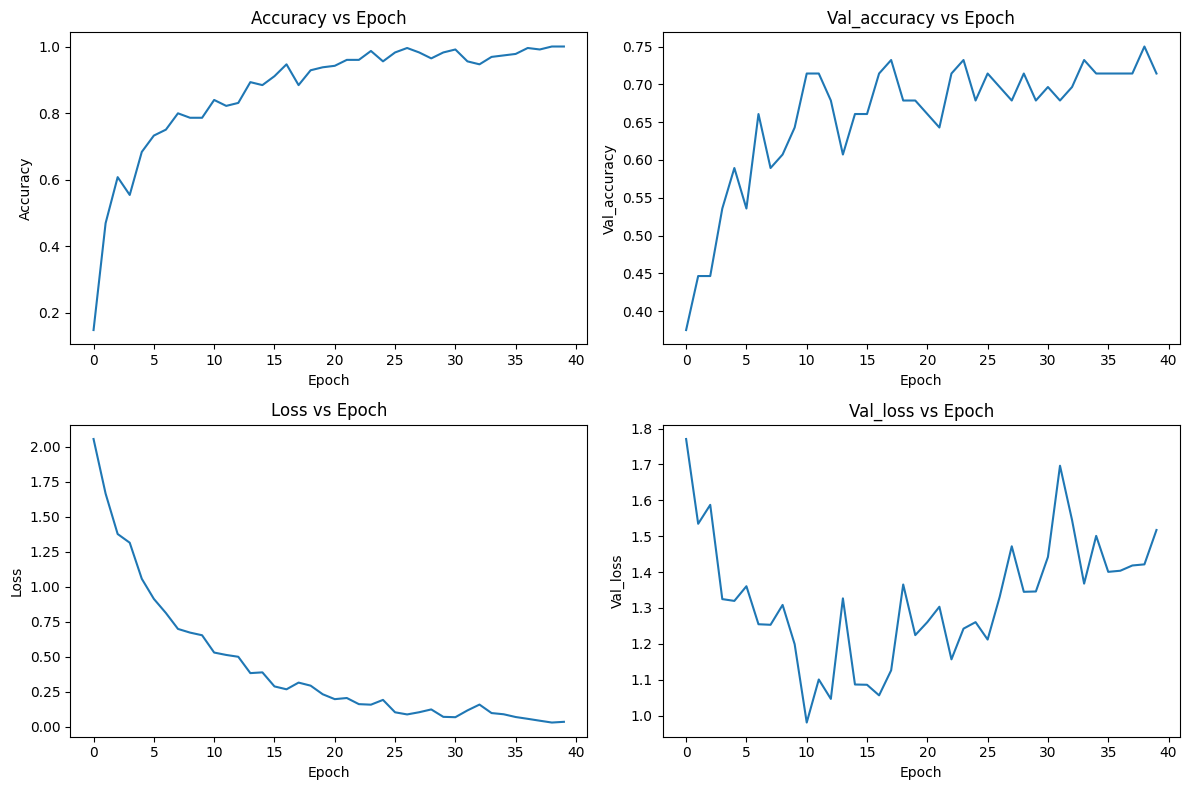

In [55]:
# Crear figura y subtramas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Accuracy vs Epoch
axes[0, 0].plot(history_4.history['accuracy'], label='accuracy')
axes[0, 0].set_title('Accuracy vs Epoch')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')

# Val_accuracy vs Epoch
axes[0, 1].plot(history_4.history['val_accuracy'], label='val_accuracy')
axes[0, 1].set_title('Val_accuracy vs Epoch')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Val_accuracy')

# Loss vs Epoch
axes[1, 0].plot(history_4.history['loss'], label='loss')
axes[1, 0].set_title('Loss vs Epoch')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')

# Val_loss vs Epoch
axes[1, 1].plot(history_4.history['val_loss'], label='val_loss')
axes[1, 1].set_title('Val_loss vs Epoch')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Val_loss')

# Ajustar espaciado entre subtramas
plt.tight_layout()

# Mostrar la figura
plt.show()

In [56]:
y_pred_4 = model_4.predict(X_test)
y_pred_4_clases = np.argmax(y_pred_4,axis=1)
accuracy_score(y_pred_4_clases,y_test_clases)

2/2 [==============================] - 0s 7ms/step


0.7142857142857143

In [57]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 512)               26112     
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               262656    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dense_14 (Dense)            (None, 8)                 4104      
                                                                 
Total params: 555,528
Trainable params: 555,528
Non-tr

#### Arquitectura 5: CNN

En esta quinta arquitectura cambiaremos a una arquitectura CNN, manteniendo la cantidad de capas de una forma similar:


1.   Conv. cap con 32 filtros de tamaño 3, función de acitvación ReLu e input shape de (50,1).
2.   Capa de submuestreo, reducción a la mitad.
3.   Conv. cap con 64 filtros de tamaño 3, función de acitvación ReLu.
4.   Capa de submuestreo, reducción a la mitad.
5.   Capa de aplanamiento.
6.   Capa densa con 64 nodos y función de activación ReLu.
7.   Capa densa con 8 nodos y función de activación softmax.

con un optimizador **adam** y learning rate 0.001.

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [59]:
model_5 = Sequential()
model_5.add(Conv1D(32, 3, activation='relu', input_shape=(50,1))) #1
model_5.add(MaxPooling1D(2))#2
model_5.add(Conv1D(64, 3, activation='relu'))#3
model_5.add(MaxPooling1D(2))#4
model_5.add(Flatten())#5
model_5.add(Dense(64, activation='relu'))#6
model_5.add(Dense(8, activation='softmax'))#7

In [60]:
model_5.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'] )

In [61]:
history_5 = model_5.fit(X_train, y_train, epochs=70, batch_size=128, verbose=2, validation_data=(X_test, y_test))

Epoch 1/70
2/2 - 1s - loss: 2.0932 - accuracy: 0.1429 - val_loss: 2.0676 - val_accuracy: 0.1964 - 1s/epoch - 704ms/step
Epoch 2/70
2/2 - 0s - loss: 2.0507 - accuracy: 0.2634 - val_loss: 2.0541 - val_accuracy: 0.2500 - 61ms/epoch - 31ms/step
Epoch 3/70
2/2 - 0s - loss: 2.0211 - accuracy: 0.3438 - val_loss: 2.0458 - val_accuracy: 0.2321 - 100ms/epoch - 50ms/step
Epoch 4/70
2/2 - 0s - loss: 1.9934 - accuracy: 0.4018 - val_loss: 2.0317 - val_accuracy: 0.2679 - 67ms/epoch - 34ms/step
Epoch 5/70
2/2 - 0s - loss: 1.9643 - accuracy: 0.4107 - val_loss: 2.0107 - val_accuracy: 0.2500 - 58ms/epoch - 29ms/step
Epoch 6/70
2/2 - 0s - loss: 1.9309 - accuracy: 0.4598 - val_loss: 1.9810 - val_accuracy: 0.2857 - 57ms/epoch - 28ms/step
Epoch 7/70
2/2 - 0s - loss: 1.8906 - accuracy: 0.4911 - val_loss: 1.9388 - val_accuracy: 0.3393 - 60ms/epoch - 30ms/step
Epoch 8/70
2/2 - 0s - loss: 1.8465 - accuracy: 0.5580 - val_loss: 1.8925 - val_accuracy: 0.3393 - 58ms/epoch - 29ms/step
Epoch 9/70
2/2 - 0s - loss: 1.79

##### Evaluación y métricas arquitectura 5

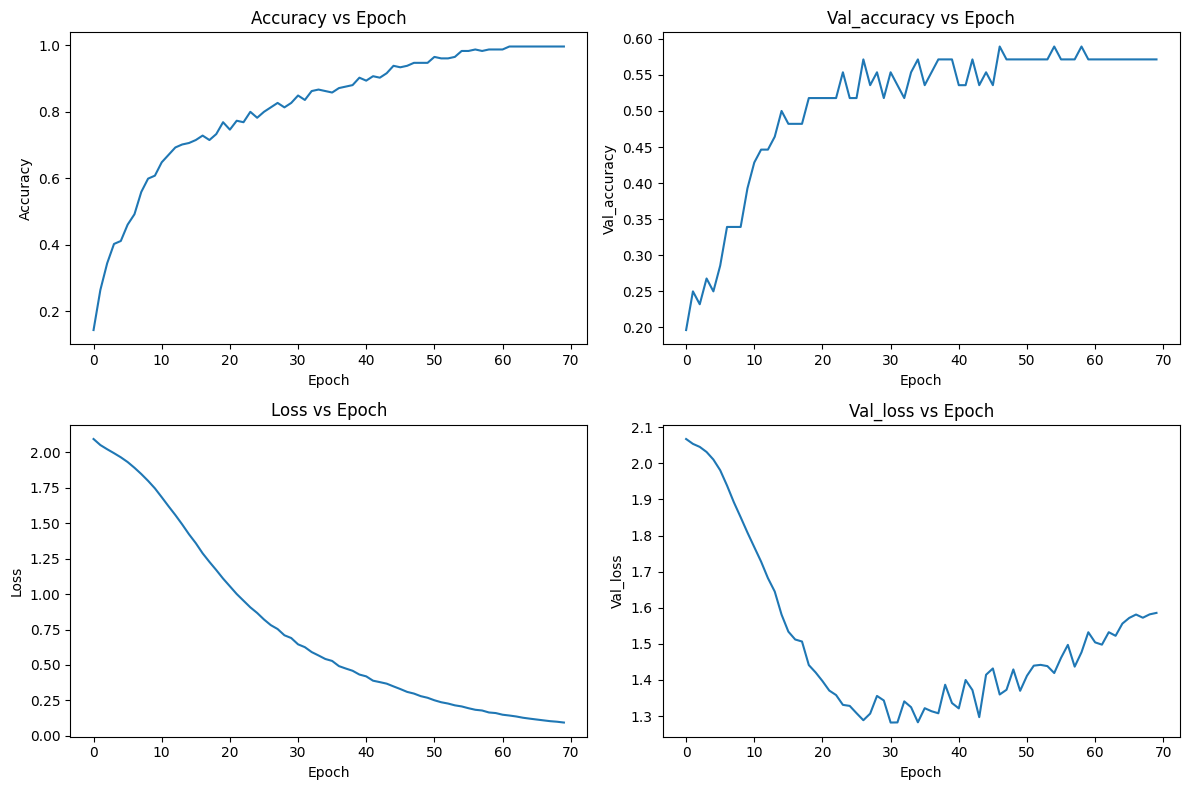

In [62]:
# Crear figura y subtramas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Accuracy vs Epoch
axes[0, 0].plot(history_5.history['accuracy'], label='accuracy')
axes[0, 0].set_title('Accuracy vs Epoch')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')

# Val_accuracy vs Epoch
axes[0, 1].plot(history_5.history['val_accuracy'], label='val_accuracy')
axes[0, 1].set_title('Val_accuracy vs Epoch')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Val_accuracy')

# Loss vs Epoch
axes[1, 0].plot(history_5.history['loss'], label='loss')
axes[1, 0].set_title('Loss vs Epoch')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')

# Val_loss vs Epoch
axes[1, 1].plot(history_5.history['val_loss'], label='val_loss')
axes[1, 1].set_title('Val_loss vs Epoch')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Val_loss')

# Ajustar espaciado entre subtramas
plt.tight_layout()

# Mostrar la figura
plt.show()

In [63]:
y_pred_5 = model_5.predict(X_test)
y_pred_5_clases = np.argmax(y_pred_5,axis=1)
accuracy_score(y_pred_5_clases,y_test_clases)

2/2 [==============================] - 0s 6ms/step


0.5714285714285714

In [64]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 48, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 24, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 22, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 11, 64)           0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 704)               0         
                                                                 
 dense_15 (Dense)            (None, 64)               

#### Arquitectura 6: CNN

En esta quinta arquitectura haremos una arquitectura CNN:


1.   Conv. cap con 64 filtros de tamaño 3, función de acitvación ReLu e input shape de (50,1).
2.   Conv. cap con 64 filtros de tamaño 3, función de acitvación ReLu.
3.   Capa de submuestreo, reducción a la mitad.
4.   Conv. cap con 128 filtros de tamaño 3, función de acitvación ReLu.
5.   Conv. cap con 128 filtros de tamaño 3, función de acitvación ReLu.
6.   Capa de submuestreo, reducción a la mitad.
7.   Capa de aplanamiento.
8.   Capa densa con 256 nodos y función de activación ReLu.
9.   Capa de regularización con dropout 0.5.
10.  Capa densa con 128 nodos y función de activación ReLu.
11.  Capa densa con 8 nodos y función de activación softmax.

con un optimizador **adam** y learning rate 0.001.

In [65]:
model_6 = Sequential()
model_6.add(Conv1D(64, 3, activation='relu', input_shape=(50, 1)))#1
model_6.add(Conv1D(64, 3, activation='relu'))#2
model_6.add(MaxPooling1D(2))#3
model_6.add(Conv1D(128, 3, activation='relu'))#4
model_6.add(Conv1D(128, 3, activation='relu'))#5
model_6.add(MaxPooling1D(2))#6
model_6.add(Flatten())#7
model_6.add(Dense(256, activation='relu'))#8
model_6.add(Dropout(0.5))#9
model_6.add(Dense(128, activation='relu'))#10
model_6.add(Dense(8, activation='softmax'))#11

In [66]:
model_6.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'] )

In [67]:
history_6 = model_6.fit(X_train, y_train, epochs=70, batch_size=128, verbose=2, validation_data=(X_test, y_test))

Epoch 1/70
2/2 - 3s - loss: 2.0786 - accuracy: 0.1339 - val_loss: 2.0821 - val_accuracy: 0.1429 - 3s/epoch - 1s/step
Epoch 2/70
2/2 - 0s - loss: 2.0608 - accuracy: 0.1696 - val_loss: 2.0801 - val_accuracy: 0.1071 - 159ms/epoch - 79ms/step
Epoch 3/70
2/2 - 0s - loss: 2.0416 - accuracy: 0.2232 - val_loss: 2.0664 - val_accuracy: 0.0536 - 159ms/epoch - 79ms/step
Epoch 4/70
2/2 - 0s - loss: 2.0241 - accuracy: 0.1652 - val_loss: 2.0376 - val_accuracy: 0.0536 - 163ms/epoch - 81ms/step
Epoch 5/70
2/2 - 0s - loss: 1.9967 - accuracy: 0.1473 - val_loss: 1.9782 - val_accuracy: 0.0714 - 155ms/epoch - 77ms/step
Epoch 6/70
2/2 - 0s - loss: 1.9450 - accuracy: 0.2321 - val_loss: 1.9085 - val_accuracy: 0.2857 - 164ms/epoch - 82ms/step
Epoch 7/70
2/2 - 0s - loss: 1.8726 - accuracy: 0.3214 - val_loss: 1.8080 - val_accuracy: 0.3214 - 150ms/epoch - 75ms/step
Epoch 8/70
2/2 - 0s - loss: 1.7767 - accuracy: 0.3571 - val_loss: 1.6867 - val_accuracy: 0.4107 - 146ms/epoch - 73ms/step
Epoch 9/70
2/2 - 0s - loss: 1

##### Evaluación y métricas arquitectura 6

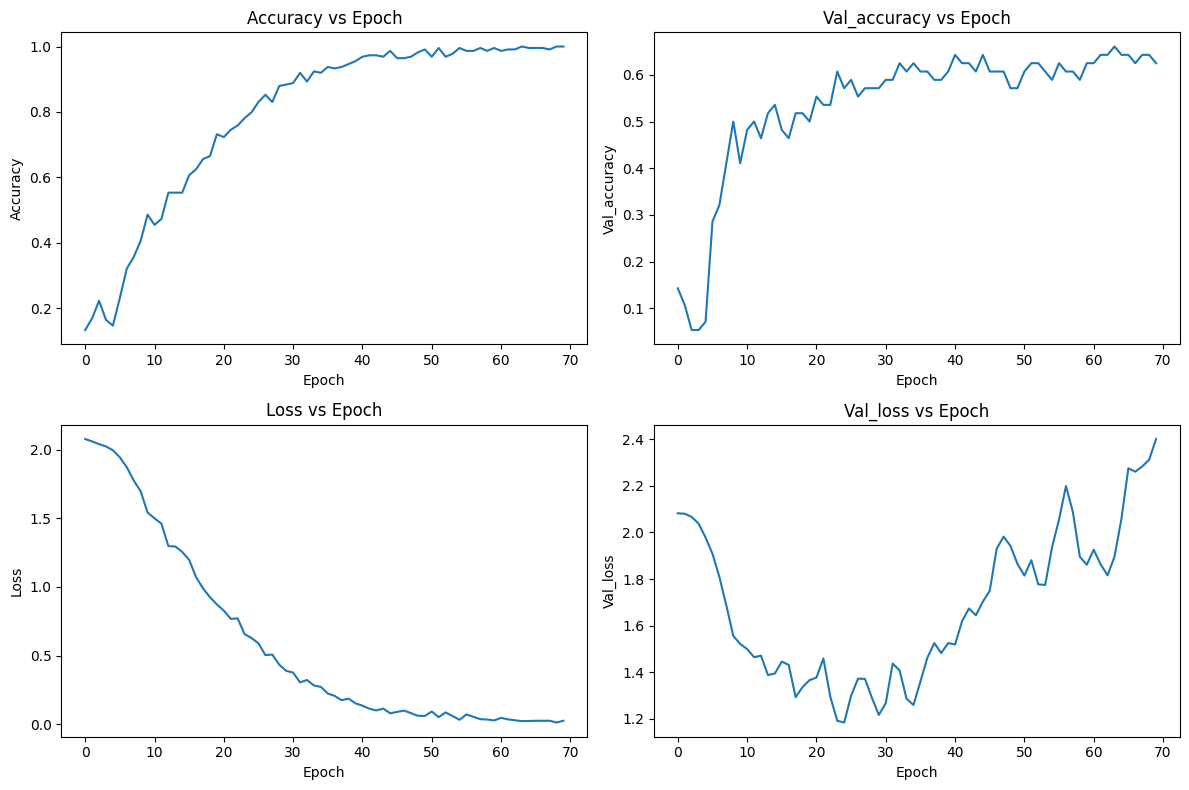

In [68]:
# Crear figura y subtramas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Accuracy vs Epoch
axes[0, 0].plot(history_6.history['accuracy'], label='accuracy')
axes[0, 0].set_title('Accuracy vs Epoch')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')

# Val_accuracy vs Epoch
axes[0, 1].plot(history_6.history['val_accuracy'], label='val_accuracy')
axes[0, 1].set_title('Val_accuracy vs Epoch')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Val_accuracy')

# Loss vs Epoch
axes[1, 0].plot(history_6.history['loss'], label='loss')
axes[1, 0].set_title('Loss vs Epoch')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')

# Val_loss vs Epoch
axes[1, 1].plot(history_6.history['val_loss'], label='val_loss')
axes[1, 1].set_title('Val_loss vs Epoch')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Val_loss')

# Ajustar espaciado entre subtramas
plt.tight_layout()

# Mostrar la figura
plt.show()

In [69]:
y_pred_6 = model_6.predict(X_test)
y_pred_6_clases = np.argmax(y_pred_6,axis=1)
accuracy_score(y_pred_6_clases,y_test_clases)

2/2 [==============================] - 0s 14ms/step


0.625

In [70]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 48, 64)            256       
                                                                 
 conv1d_3 (Conv1D)           (None, 46, 64)            12352     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 23, 64)           0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 21, 128)           24704     
                                                                 
 conv1d_5 (Conv1D)           (None, 19, 128)           49280     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 9, 128)           0         
 1D)                                                  

## Selección de modelo y concluciones

En este proyecto, se desarrollaron varios modelos de ML utilizando RRNN para predecir el resultado académico de los estudiantes. Luego de aplicar técnicas de preprocesamiento, análisis exploratorio se realizaron seis modelos distintos, algunos con mas variaciones que otros, obteniendo los siguientes resultados:



```
----------------------------------------------------
Modelo | parámetros | accuracy            | Tipo    
----------------------------------------------------
1      |292.872     | 0.686428714285714   | ANN
----------------------------------------------------
2      |555.528     | 0.7321428571428571  | ANN
----------------------------------------------------
3      |555.528     | 0.7321428571428571  | ANN
----------------------------------------------------
4      |555.528     | 0.7142857142857143  | ANN
----------------------------------------------------
5      |51.976      | 0.5714285714285714  | CNN
----------------------------------------------------
6      |415.688     | 0.625               | CNN
----------------------------------------------------
```

Por los resulados obtenidos, puedo concluir que los modelos fully connected son los indicados para este problema, más no puedo decidir por uno de los 3 primeros en particular. En el caso del primero el accuracy es algo menor, pero la cantidad de parámetros es bastante menor. En el caso del segundo y tercero, a pesar de cambiar algunas cosas su performance es el mismo. Además de lo anterior es importante mencionar que  se entrenaron los algoritmos con las arquitecturas dadas varias veces desde cero y hubo pequeñas variaciones en el performance de todos, diferencias que podrían hacer, por ejemplo, que el primero obtenga más accuracy que el segundo en algunas ocaciones.

Así, por el momento, me quedaría con el modedlo n° 2, pero como conclución puedo decir que los datos entregados no son suficientes para obtener diferencias considerables entre modelos.